In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re

from datetime import datetime
from dateutil import parser

Pandas是在NumPy基础上建立的新程序库，提供了一种高效的DataFrame数据结构。DataFrame本质上是一种带行标签和列标签、支持相同类型数据和缺失值的多维数组。Pandas不仅为带各种标签的数据提供了便利的存储界面，还实现了许多强大的操作，这些操作对数据库框架和电子表格程序的用户来说非常熟悉。

建立在NumPy数组结构上的Pandas，尤其是它的Series和DataFrame对象，为数据科学家们处理那些消耗大量时间的 “数据清理”（data munging）任务提供了捷径。

## 3.1 安装并使用Pandas
在安装Pandas之前，确保你的操作系统中有NumPy。如果你是从源代码直接编译，那么还需要相应的工具编译建立Pandas所需的C语言与Cython代码。详细的安装方法，请参考[Pandas官方文档](http://pandas.pydata.org/)。

## 3.2 Pandas对象简介
如果从底层视角观察Pandas对象，可以把它们看成增强版的NumPy结构化数组，行列都不再只是简单的整数索引，还可以带上标签。在本章后面的内容中我们将会发现，虽然Pandas在基本数据结构上实现了许多便利的工具、方法和功能，但是后面将要介绍的每一个工具、方法和功能几乎都需要我们理解基本数据结构的内部细节。因此，在深入学习Pandas之前，先来看看Pandas的三个基本数据结构：Series、DataFrame和Index。

### 3.2.1 Pandas的Series对象
Pandas的Series对象是一个带索引数据构成的一维数组。可以用一个数组创建Series对象，如下所示：

In [2]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

从上面的结果中，你会发现Series对象将一组数据和一组索引绑定在一起，我们可以通过`values属性`和`index属性`获取数据。values属性返回的结果与NumPy数组类似：

In [3]:
data.values

array([ 0.25,  0.5 ,  0.75,  1.  ])

index属性返回的结果是一个类型为pd.Index的类数组对象：

In [4]:
data.index

RangeIndex(start=0, stop=4, step=1)

和NumPy数组一样，数据可以通过Python的中括号索引标签获取，但Pandas的Series对象比它模仿的一维NumPy数组更加通用、灵活：

In [5]:
data[1]

0.5

In [6]:
data[1:3]

1    0.50
2    0.75
dtype: float64

#### 3.2.1.1 Serise是通用的NumPy数组
到目前为止，我们可能觉得Series对象和一维NumPy数组基本可以等价交换，但两者间的本质差异其实是索引：NumPy数组通过隐式定义的整数索引获取数值，而Pandas的Series对象用一种显式定义的索引与数值关联。

显式索引的定义让Series对象拥有了更强的能力，索引不再仅仅是整数，还可以是任意想要的类型。如果需要，完全可以用字符串定义索引：

In [7]:
data = pd.Series([0.25, 0.5, 0.75, 1.0], index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [8]:
data['b']

0.5

也可以使用不连续或不按顺序的索引：

In [9]:
data = pd.Series([0.25, 0.5, 0.75, 1.0], index=[2, 5, 3, 7])
data

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64

#### 3.2.1.2 Series是特殊的字典
你可以把Pandas的Series对象看成一种特殊的Python字典。字典是一种将任意键映射到一组任意值的数据结构，而Series对象其实是一种将类型键映射到一组类型值的数据结构。**类型至关重要：就像NumPy数组背后特定类型的经过编译的代码使得它在某些操作上比普通的Python列表更加高效一样，Pandas.Series的类型信息使得它在某些操作上比Python的字典更高效**。

我们可以直接用Python的字典创建一个Series对象，让Series对象与字典的类比更加清晰：

In [10]:
population_dict = {'California': 38332521, 
                   'Texas': 26448193, 
                   'New York': 19651127, 
                   'Florida': 19552860, 
                   'Illinois': 12882135}

population = pd.Series(population_dict)
population

California    38332521
Florida       19552860
Illinois      12882135
New York      19651127
Texas         26448193
dtype: int64

用字典创建Series对象时，其索引默认按照顺序排列。典型的字典数值获取方式仍然有效：

In [11]:
population['California']

38332521

和字典不同，Series对象还支持数组形式的操作，比如切片：

In [12]:
population['California':'Illinois']

California    38332521
Florida       19552860
Illinois      12882135
dtype: int64

#### 3.2.1.3 创建Series对象
我们已经见过几种创建Pandas的Series对象的方法，都是像这样的形式：
```python
pd.Series(data, index=index)
```

其中，`index`是一个可选参数，`data参数`支持多种数据类型。

例如，data可以是列表或NumPy数组，这时index默认值为整数序列：

In [13]:
pd.Series([2, 4, 6])

0    2
1    4
2    6
dtype: int64

data也可以是一个标量，创建Series对象时会重复填充到每个索引上：

In [14]:
pd.Series(5, index=[100, 200, 300])

100    5
200    5
300    5
dtype: int64

data还可以是一个字典，index默认是排序的字典键：

In [15]:
pd.Series({2:'a', 1:'b', 3:'c'})

1    b
2    a
3    c
dtype: object

采用形式可以通过显式指定索引筛选需要的结果，Series对象只会保留显式定义的键值对：

In [16]:
pd.Series({2:'a', 1:'b', 3:'c'}, index=[3, 2])

3    c
2    a
dtype: object

### 3.2.2 Pandas的DataFrame对象
Pandas的另一个基础数据结构是DataFrame。和Series对象一样，DataFrame既可以作为一个通用型NumPy数组，也可以看作特殊的Python字典。

#### 3.2.2.1 DataFrame是通用的NumPy数组
如果将Series类比为带灵活索引的一维数组，那么DataFrame就可以看作是一种既有灵活的行索引，又有灵活列名的二维数组。就像你可以把二维数组看成是有序排列的一维数组一样，你也可以把DataFrame看成是有序排列的若干Series对象。这里的“排列”指的是它们拥有共同的索引。

我们用美国五个州面积的数据创建一个新的Series：

In [17]:
area_dict = {'California': 423967, 
             'Texas': 695662, 
             'New York': 141297, 
             'Florida': 170312, 
             'Illinois': 149995} 
area = pd.Series(area_dict)
area

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
dtype: int64

再结合之前创建的population的Series对象，用一个字典创建一个包含这些信息的二维对象：

In [18]:
population

California    38332521
Florida       19552860
Illinois      12882135
New York      19651127
Texas         26448193
dtype: int64

In [19]:
states = pd.DataFrame({'population': population, 'area': area})
states

,area,population
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


和Series对象一样，DataFrame也有一个index属性可以获取索引标签：

In [20]:
states.index

Index(['California', 'Florida', 'Illinois', 'New York', 'Texas'], dtype='object')

另外，DataFrame还有一个columns属性，是存放列标签的Index对象：

In [21]:
states.columns

Index(['area', 'population'], dtype='object')

DataFrame可以看作一种通用的NumPy二维数组，它的行与列都可以通过索引获取。

#### 3.2.2.2 DataFrame是特殊的字典
我们也可以把DataFrame看成一种特殊的字典。字典是一个键映射一个值，而DataFrame是一列映射一个Series的数据。例如，通过`area`的列属性可以返回包含面积数据的Series对象：

In [22]:
states['area']

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

#### 3.2.2.3 创建DataFrame对象
Pandas的DataFrame对象可以通过许多方式创建，这里举几个常用的例子。

**通过单个Series对象创建**。DataFrame是一组Series对象的集合，可以用单个Series创建一个单列的DataFrame：

In [23]:
pd.DataFrame(population, columns=['population'])

,population
California,38332521
Florida,19552860
Illinois,12882135
New York,19651127
Texas,26448193


**通过字典列表创建**。任何元素是字典的列表都可以变成DataFrame。用一个简单的列表综合来创建一些数据：

In [24]:
data = [{'a': i, 'b': 2 * i} for i in range(3)] 
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


如果字典中有些键不存在，Pandas会用NaN(not a number)来表示：

In [25]:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


**通过Series对象字典创建**。就像之前见过的那样，DataFrame也可以用一个由Series对象构成的字典创建：

In [26]:
pd.DataFrame({'population': population, 'area': area})

,area,population
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


**通过NumPy二维数组创建**。假如有一个二维数组，就可以创建一个可以指定行列索引值的DataFrame。如果不指定行列索引值，那么行列默认都是整数索引值：

In [27]:
pd.DataFrame(np.random.rand(3, 2), columns=['foo', 'bar'], index=['a', 'b', 'c'])

,foo,bar
a,0.922618,0.808331
b,0.528919,0.715269
c,0.328306,0.785652


**通过NumPy结构化数组创建**。由于Pandas的DataFrame与结构化数组十分相似，因此可以通过结构化数组创建DataFrame：

In [28]:
A = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')])
A

array([(0,  0.), (0,  0.), (0,  0.)],
      dtype=[('A', '<i8'), ('B', '<f8')])

In [29]:
pd.DataFrame(A)

,A,B
0,0,0.0
1,0,0.0
2,0,0.0


### 3.2.3 Pandas的Index对象
Series和DataFrame对象都使用便于引用和调整的显式索引。Pandas的Index对象是一个很有趣的数据结构，可以将它看作是一个不可变数组或有序集合（实际上是一个多集，因为Index对象可能会包含重复值）。这两种观点使得Index对象能呈现一些有趣的功能。

让我们用一个简单的整数列表来创建一个Index对象：

In [30]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

#### 3.2.3.1 将Index看作不可变数组
Index对象的许多操作都像数组：

In [31]:
ind[1]

3

In [32]:
ind[::2]

Int64Index([2, 5, 11], dtype='int64')

Index对象还有许多与NumPy数组相似的属性：

In [33]:
ind.size, ind.shape, ind.ndim, ind.dtype

(5, (5,), 1, dtype('int64'))

Index对象与NumPy数组之间的不同在于，Index对象的索引是不可变的，也就是说不能通过通常的方式进行调整。Index对象的不可变特征使得多个DataFrame和数组之间进行索引共享时更加安全，尤其是可以避免因修改索引时粗心大意而导致的副作用。

#### 3.2.3.2 将Index看作有序集合
Pandas对象被设计用于实现许多操作，如join数据集，其中会涉及许多集合操作。 Index对象遵循Python标准库的集合(set)数据结构的许多习惯用法，包括并集、交集、差集等：

In [34]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

# 交集
indA & indB

Int64Index([3, 5, 7], dtype='int64')

In [35]:
# 并集
indA | indB

Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [36]:
# 异或
indA ^ indB

Int64Index([1, 2, 9, 11], dtype='int64')

## 3.3 数据取值与选择
下面介绍Pandas的Series和DataFrame对象相似的数据获取与调整操作。我们将从简单的一维Series对象开始，然后再用比较复杂的二维DataFrame对象进行演示。

### 3.3.1 Series数据选择方法
Series对象与一维NumPy数组和标准Python字典在许多方面都一样，记住这两个类比，就可以帮助我们更好地理解Series对象的数据索引与选择模式。

#### 3.3.1.1 将Series看作字典
和字典一样，Series对象提供了键值对的映射：

In [37]:
data = pd.Series([0.25, 0.5, 0.75, 1.0], index=['a', 'b', 'c', 'd']) 
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

可以用Python字典的表达式和方法来检测键/索引和值：

In [38]:
'a' in data

True

In [39]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [40]:
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

Series对象还可以用字典语法调整数据。Series对象的可变性是一个非常方便的特性，Pandas在底层已经为可能发生的内存布局和数据复制自动决策，用户不需要担心这些问题：

In [41]:
data['e'] = 1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

#### 3.3.1.2 将Series看作一维数组
Series不仅有着和字典一样的接口，而且还具备和NumPy数组一样的数组数据选择功能，包括索引、掩码、花哨的索引等操作：

In [42]:
# 将显式索引作为切片
data['a':'c']

a    0.25
b    0.50
c    0.75
dtype: float64

In [43]:
# 将隐式整数索引作为切片 
data[0:2]

a    0.25
b    0.50
dtype: float64

In [44]:
# 掩码 
data[(data > 0.3) & (data < 0.8)]

b    0.50
c    0.75
dtype: float64

In [45]:
# 花哨的索引 
data[['a', 'e']]

a    0.25
e    1.25
dtype: float64

在以上示例中，切片是绝大部分混乱之源。**需要注意的是，当使用显式索引(即`data['a':'c']`)作切片时，结果包含最后一个索引；而当使用隐式索引(即`data[0:2]`)作切片时，结果不包含最后一个索引**。

#### 3.3.1.3 索引器:loc,iloc和ix
这些切片和取值的习惯用法经常会造成混乱。例如，如果你的Series是显式整数索引，那么`data[1]`这样的取值操作会使用显式索引，而`data[1:3]`这样的切片操作却会使用隐式索引：

In [46]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])

# 取值操作是显式索引 
data[1]

'a'

In [47]:
# 切片操作是隐式索引 
data[1:3]

3    b
5    c
dtype: object

由于整数索引很容易造成混淆，所以Pandas提供了一些索引器(indexer)属性来作为取值的方法。它们不是Series对象的函数方法，而是暴露切片接口的属性。

**第一种索引器是`loc`属性，表示取值和切片都是显式的**：

In [48]:
data.loc[1]

'a'

In [49]:
data.loc[1:3]

1    a
3    b
dtype: object

**第二种是`iloc`属性，表示取值和切片都是Python形式的隐式索引**：

In [50]:
data.iloc[1]

'b'

In [51]:
data.iloc[1:3]

3    b
5    c
dtype: object

**第三种取值属性是`ix`，它是前两种索引器的混合形式，等价于标准的Python列表`[]`取值方式**。

Python代码的设计原则之一是“显式优于隐式”。使用loc和iloc可以让代码更容易维护，可读性更高。特别是在处理整数索引的对象时，我强烈推荐使用这两种索引器。它们既可以让代码阅读和理解起来更容易，也能避免因误用索引/切片而产生的小bug。

### 3.3.2 DataFrame数据选择方法
DataFrame在有些方面像二维或结构化数组，在有些方面又像一个共享索引的若干Series对象构成的字典。这两种类比可以帮助我们更好地掌握这种数据结构的数据选择方法。

#### 3.3.2.1 将DataFrame看作字典
用之前的美国五州面积与人口数据来演示：

In [52]:
area = pd.Series({'California': 423967, 
                  'Texas': 695662,
                  'New York': 141297, 
                  'Florida': 170312, 
                  'Illinois': 149995}) 

pop = pd.Series({'California': 38332521, 
                 'Texas': 26448193, 
                 'New York': 19651127, 
                 'Florida': 19552860, 
                 'Illinois': 12882135}) 

data = pd.DataFrame({'area':area, 'pop':pop}) 
data

,area,pop
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


可以通过对列名进行字典形式的取值获取数据：

In [53]:
data['area']

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

也可以用属性形式选择纯字符串列名的数据：

In [54]:
data.area

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

对同一个对象进行属性形式与字典形式的列数据，结果是相同的：

In [55]:
data.area is data['area']

True

**虽然属性形式的数据选择方法很方便，但是它并不是通用的。如果列名不是纯字符串，或者列名与DataFrame的方法同名，那么就不能用属性索引**。例如，DataFrame有一个`pop()`方法，如果用`data.pop`就不会获取`pop`列，而是显示为方法：

In [56]:
data.pop is data['pop']

False

还应该避免对用属性形式选择的列直接赋值(即可以用`data['pop'] = z`，但不要用`data.pop = z`)。

和前面介绍的Series对象一样，还可以用字典形式的语法调整对象，如果要增加一列可以这样做：

In [57]:
data['density'] = data['pop'] / data['area'] 
data

,area,pop,density
California,423967,38332521,90.413926
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763
New York,141297,19651127,139.076746
Texas,695662,26448193,38.018740


#### 3.3.2.2 将DataFrame看作二维数组
可以把DataFrame看成是一个增强版的二维数组，用values属性按行查看数组数据：

In [58]:
data.values

array([[  4.23967000e+05,   3.83325210e+07,   9.04139261e+01],
       [  1.70312000e+05,   1.95528600e+07,   1.14806121e+02],
       [  1.49995000e+05,   1.28821350e+07,   8.58837628e+01],
       [  1.41297000e+05,   1.96511270e+07,   1.39076746e+02],
       [  6.95662000e+05,   2.64481930e+07,   3.80187404e+01]])

理解了这一点，就可以把许多数组操作方式用在DataFrame上。例如，可以对DataFrame进行行列转置：

In [59]:
data.T

,California,Florida,Illinois,New York,Texas
area,4.239670e+05,1.703120e+05,1.499950e+05,1.412970e+05,6.956620e+05
pop,3.833252e+07,1.955286e+07,1.288214e+07,1.965113e+07,2.644819e+07
density,9.041393e+01,1.148061e+02,8.588376e+01,1.390767e+02,3.801874e+01


通过字典形式对列进行取值显然会限制我们把DataFrame作为NumPy数组可以获得的能力，尤其是当我们在DataFrame数组中使用单个行索引获取一行数据时：

In [60]:
data.values[0]

array([  4.23967000e+05,   3.83325210e+07,   9.04139261e+01])

而获取一列数据就需要向DataFrame传递单个列索引：

In [61]:
data['area']

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

在进行数组形式的取值时，我们需要用另一种方法，即Pandas索引器。通过iloc索引器，我们就可以像对待NumPy数组一样索引Pandas的底层数组(Python的隐式索引)，DataFrame的行列标签会自动保留在结果中：

In [62]:
data

,area,pop,density
California,423967,38332521,90.413926
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763
New York,141297,19651127,139.076746
Texas,695662,26448193,38.018740


In [63]:
data.iloc[:3, :2]

,area,pop
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135


In [64]:
data.loc[:'Illinois', :'pop']

,area,pop
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135


使用`ix`索引器可以实现一种混合效果：

In [65]:
data.ix[:3, :'pop']

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,area,pop
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135


任何用于处理NumPy形式数据的方法都可以用于这些索引器：

In [66]:
data.loc[data.density > 100, ['pop', 'density']]

,pop,density
Florida,19552860,114.806121
New York,19651127,139.076746


In [67]:
# 任何一种取值方法都可以用于调整数据
data.iloc[0, 2] = 90
data

,area,pop,density
California,423967,38332521,90.000000
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763
New York,141297,19651127,139.076746
Texas,695662,26448193,38.018740


#### 3.3.2.3 其他取值方法
还有一些取值方法和前面介绍过的方法不太一样。它们虽然看着有点奇怪，但是在实践中还是很好用的。

首先，如果对单个标签取值就选择列，而对多个标签用切片就选择行：

In [68]:
data['Florida':'Illinois']

,area,pop,density
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [69]:
data['area':'pop']

,area,pop,density


In [70]:
# 切片也可以不用索引值，而直接用行数来实现
data[1:3]

,area,pop,density
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [71]:
# 掩码操作也可以直接对每一行进行过滤，而不需要使用loc索引器
data[data.density > 100]

,area,pop,density
Florida,170312,19552860,114.806121
New York,141297,19651127,139.076746


## 3.4 Pandas数值运算方法
NumPy的基本能力之一是快速对每个元素进行运算，既包括基本算术运算，也包括更复杂的运算。Pandas继承了NumPy的功能，在`2.3节`介绍过的通用函数是关键。

但是Pandas也实现了一些高效技巧：对于一元运算(像函数与三角函数)，这些通用函数将在输出结果中保留索引和列标签；而对于二元运算(如加法和乘法)，Pandas在传递通用函数时会自动对齐索引进行计算。这就意味着，保存数据内容与组合不同来源的数据——两处在NumPy数组中都容易出错的地方——变成了Pandas的杀手锏。后面还会介绍一些关于一维Series和二维DataFrame的便捷运算方法。

### 3.4.1 通用函数：保留索引
Pandas是建立在NumPy基础之上的，所以NumPy的通用函数同样适用于Series和DataFrame对象：

In [72]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10, 4)) 
ser

0    6
1    3
2    7
3    4
dtype: int64

In [73]:
df = pd.DataFrame(rng.randint(0, 10, (3, 4)),
                  columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,6,9,2,6
1,7,4,3,7
2,7,2,5,4


如果对这两个对象的其中一个使用NumPy通用函数，生成的结果是另一个保留索引的Pandas对象：

In [74]:
np.exp(ser)

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

In [75]:
np.sin(df*np.pi/4)

,A,B,C,D
0,-1.000000,7.071068e-01,1.000000,-1.000000e+00
1,-0.707107,1.224647e-16,0.707107,-7.071068e-01
2,-0.707107,1.000000e+00,-0.707107,1.224647e-16


### 3.4.2 通用函数：索引对齐
当在两个Series或DataFrame对象上进行二元计算时，Pandas会在计算过程中对齐两个对象的索引。当你处理不完整的数据时，这一点非常方便，我们将在后面的示例中看到。

#### 3.4.2.1 Series索引对齐
假如你要整合两个数据源的数据，其中一个是美国面积最大的三个州的面积数据，另一个是美国人口最多的三个州的人口数据：

In [76]:
area = pd.Series({'Alaska': 1723337, 
                  'Texas': 695662,
                  'California': 423967}, name='area') 

population = pd.Series({'California': 38332521, 
                        'Texas': 26448193, 
                        'New York': 19651127}, name='population')

population / area

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

结果数组的索引是两个输入数组索引的并集。我们也可以用Python标准库的集合运算法则来获得这个索引：

In [77]:
area.index | population.index

Index(['Alaska', 'California', 'New York', 'Texas'], dtype='object')

对于缺失位置的数据，Pandas会用NaN填充，表示“此处无数”。这种索引对齐方式是通过Python内置的集合运算规则实现的，任何缺失值默认都用NaN填充：

In [78]:
A = pd.Series([2, 4, 6], index=[0, 1, 2]) 
B = pd.Series([1, 3, 5], index=[1, 2, 3]) 
A + B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

如果用NaN值不是我们想要的结果，那么可以设置参数自定义A或B缺失的数据：

In [79]:
A.add(B, fill_value=0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

#### 3.4.2.2 DataFrame索引对齐
在计算两个DataFrame时，类似的索引对齐规则也同样会出现在共同(并集)列中：

In [80]:
A = pd.DataFrame(rng.randint(0, 20, (2, 2)), columns=list('AB'))
A

,A,B
0,1,11
1,5,1


In [81]:
B = pd.DataFrame(rng.randint(0, 10, (3, 3)), columns=list('BAC'))
B

,B,A,C
0,4,0,9
1,5,8,0
2,9,2,6


In [82]:
A + B

,A,B,C
0,1.0,15.0,NaN
1,13.0,6.0,NaN
2,NaN,NaN,NaN


在Series中，我们可以通过运算符方法的`fill_value`参数自定义缺失值。这里，我们将用A中所有值的均值来填充缺失值：

In [83]:
fill = A.stack().mean()
fill

4.5

In [84]:
A.add(B, fill_value=fill)

,A,B,C
0,1.0,15.0,13.5
1,13.0,6.0,4.5
2,6.5,13.5,10.5


### 3.4.3 通用函数：DataFrame与Series的运算
DataFrame和Series的运算规则，与NumPy中二维数组与一维数组的运算规则是一样的。

来看一个常见运算，让一个二维数组减去自身的一行数据：

In [85]:
A = rng.randint(10, size=(3, 4))
A

array([[3, 8, 2, 4],
       [2, 6, 4, 8],
       [6, 1, 3, 8]])

In [86]:
A - A[0]

array([[ 0,  0,  0,  0],
       [-1, -2,  2,  4],
       [ 3, -7,  1,  4]])

根据NumPy的广播规则，让二维数组减自身的一行数据会按行计算。在Pandas里默认也是按行运算的：

In [87]:
df = pd.DataFrame(A, columns=list('QRST')) 
df - df.iloc[0]

,Q,R,S,T
0,0,0,0,0
1,-1,-2,2,4
2,3,-7,1,4


如果你想按列计算，那么就需要利用前面介绍过的运算符方法，通过`axis参数`设置：

In [88]:
df.subtract(df['R'], axis=0)

,Q,R,S,T
0,-5,0,-6,-4
1,-4,0,-2,2
2,5,0,2,7


你会发现DataFrame/Series的运算与前面介绍的运算一样，结果的索引都会自动对齐：

In [89]:
halfrow = df.iloc[0, ::2] 
halfrow

Q    3
S    2
Name: 0, dtype: int64

In [90]:
df - halfrow

,Q,R,S,T
0,0.0,NaN,0.0,NaN
1,-1.0,NaN,2.0,NaN
2,3.0,NaN,1.0,NaN


这些行列索引的保留与对齐方法说明Pandas在运算时会一直保存这些数据内容，从而避免在处理数据类型有差异和/或维度不一致的NumPy数组时可能遇到的问题。

## 3.5 处理缺失值
本节介绍一些处理缺失值的通用规则，Pandas对缺失值的表现形式，并演示Pandas自带的几个处理缺失值的工具的用法。本节以及全书涉及的缺失值主要有三种形式：`null`、`NaN`或`NA`。

### 3.5.1 选择处理缺失值的方法
在数据表或DataFrame中有很多识别缺失值的方法。一般情况下可以分为两种：一种方法是通过一个覆盖全局的掩码表示缺失值，另一种方法是用一个标签值（sentinel value）表示缺失值。

在掩码方法中，掩码可能是一个与原数组维度相同的完整布尔类型数组，也可能是用一个比特(0或1)表示有缺失值的局部状态。

在标签方法中，标签值可能是具体的数据(例如用-9999表示缺失的整数)，也可能是些极少出现的形式。另外，标签值还可能是更全局的值，比如用`NaN`(不是一个数)表示缺失的浮点数，它是IEEE浮点数规范中指定的特殊字符。

使用这两种方法之前都需要先综合考量：使用单独的掩码数组会额外出现一个布尔类型数组，从而增加存储与计算的负担；而标签值方法缩小了可以被表示为有效值的范围，可能需要在CPU或GPU算术逻辑单元中增加额外的(往往也不是最优的)计算逻辑。通常使用的`NaN`也不能表示所有数据类型。

大多数情况下，都不存在最佳选择，不同的编程语言与系统使用不同的方法。例如，R语言在每种数据类型中保留一个比特作为缺失数据的标签值，而SciDB系统会在每个单元后面加一个额外的字节表示NA状态。

### 3.5.2 Pandas的缺失值
Pandas里处理缺失值的方式延续了NumPy程序包的方式，并没有为浮点数据类型提供内置的`NA`作为缺失值。

Pandas原本也可以按照R语言采用的比特模式为每一种数据类型标注缺失值，但是这种方法非常笨拙。R语言包含4种基本数据类型，而NumPy支持的类型远超4种。例如，R语言只有一种整数类型，而NumPy支持14种基本的整数类型，可以根据精度、符号、编码类型按需选择。如果要为NumPy的每种数据类型都设置一个比特标注缺失值，可能需要为不同类型的不同操作耗费大量的时间与精力，其工作量几乎相当于创建一个新的NumPy程序包。另外，对于一些较小的数据类型(例如8位整型数据)，牺牲一个比特作为缺失值标注的掩码还会导致其数据范围缩小。

当然，NumPy也是支持掩码数据的，也就是说可以用一个布尔掩码数组为原数组标注“无缺失值”或“有缺失值”。Pandas也集成了这个功能，但是在存储、计算和编码维护方面都需要耗费不必要的资源，因此这种方式并不可取。

综合考虑各种方法的优缺点，Pandas最终选择用标签方法表示缺失值，包括两种Python原有的缺失值：浮点数据类型的`NaN`值，以及Python的`None`对象。后面我们将会发现，虽然这么做也会有一些副作用，但是在实际运用中的效果还是不错的。

#### 3.5.2.1 None：Python对象类型的缺失值
Pandas可以使用的第一种缺失值标签是`None`，它是一个Python单体对象，经常在代码中表示缺失值。由于`None`是一个Python对象，所以不能作为任何NumPy/Pandas数组类型的缺失值，只能用于'object'数组类型（即由Python对象构成的数组）：

In [91]:
vals1 = np.array([1, None, 3, 4]) 
vals1

array([1, None, 3, 4], dtype=object)

这里`dtype=object`表示NumPy认为由于这个数组是Python对象构成的，因此将其类型判断为`object`。虽然这种类型在某些情景中非常有用，对数据的任何操作最终都会在Python层面完成，但是在进行常见的快速操作时，这种类型比其他原生类型数组要消耗更多的资源：

In [92]:
for dtype in ['object', 'int']:
    print("dtype =", dtype) 
    %timeit np.arange(1E6, dtype=dtype).sum() 
    print()

dtype = object
65.5 ms ± 328 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

dtype = int
1.54 ms ± 1.08 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)



使用Python对象构成的数组就意味着如果你对一个包含None的数组进行累计操作，如`sum()`或者`min()`，那么通常会出现类型错误。这就是说，在Python中没有定义整数与None之间的加法运算。

#### 3.5.2.2 NaN：数值类型的缺失值
另一种缺失值的标签是`NaN`是一种按照`IEEE浮点数标准`设计、在任何系统中都兼容的特殊浮点数：

In [93]:
vals2 = np.array([1, np.nan, 3, 4]) 
vals2.dtype

dtype('float64')

请注意，NumPy会为这个数组选择一个原生浮点类型，这意味着和之前的object类型数组不同，这个数组会被编译成C代码从而实现快速操作。无论和NaN进行何种操作，最终结果都是NaN：

In [94]:
1 + np.nan

nan

In [95]:
0 * np.nan

nan

In [96]:
vals2.sum(), vals2.min(), vals2.max()

(nan, nan, nan)

NumPy也提供了一些特殊的累计函数，它们可以忽略缺失值的影响：

In [97]:
np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2)

(8.0, 1.0, 4.0)

**谨记，NaN是一种特殊的浮点数，不是整数、字符串以及其他数据类型**。

#### 3.5.2.3 Pandas中NaN与None的差异
虽然NaN与None各有各的用处，但是Pandas把它们看成是可以等价交换的，在适当的时候会将两者进行替换：

In [98]:
pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

Pandas会将没有标签值的数据类型自动转换为NA。例如，当我们将整型数组中的一个值设置为`np.nan`时，这个值就会强制转换成浮点数缺失值NA：

In [99]:
x = pd.Series(range(2), dtype=int)
x

0    0
1    1
dtype: int64

In [100]:
x[0] = None
x

0    NaN
1    1.0
dtype: float64

请注意，除了将整型数组的缺失值强制转换为浮点数，Pandas还会自动将None转换为NaN。(**需要注意的是，现在GitHub上Pandas项目中已经有人提议增加一个原生的整型NA，不过到编写本书时还尚未实现。**)

Pandas对NA缺失值进行强制转换的规则如`表3-2`所示(需要注意的是，Pandas中字符串类型的数据通常是用object类型存储的。)：
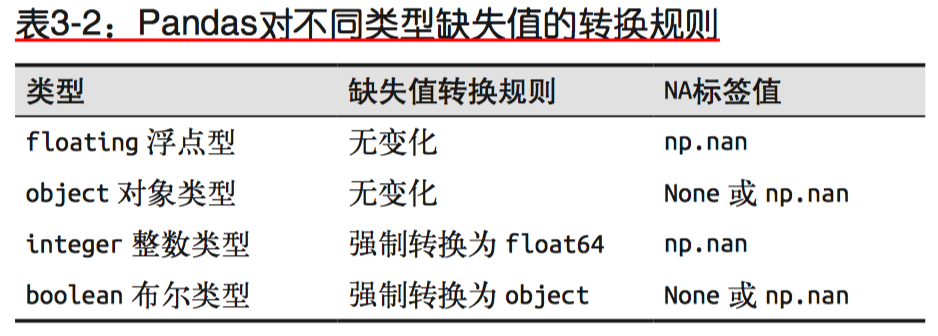

### 3.5.3 处理缺失值
我们已经知道，Pandas基本上把None和NaN看成是可以等价交换的缺失值形式。为了完成这种交换过程，Pandas提供了一些方法来发现、剔除、替换数据结构中的缺失值，主要包括以下几种：
+ isnull(): 检查array-like数据结构中的缺失值
+ notnull(): 与isnull()操作相反
+ dropna(): 返回一个剔除缺失值的数据
+ fillna(): 返回一个填充了缺失值的数据副本

#### 3.5.3.1 发现缺失值
Pandas数据结构有两种有效的方法可以发现缺失值：

In [101]:
data = pd.Series([1, np.nan, 'hello', None])
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

布尔类型掩码数组可以直接作为Series或DataFrame的索引使用：

In [102]:
data[data.notnull()]

0        1
2    hello
dtype: object

在Series里使用的isnull()和notnull()同样适用于DataFrame，产生的结果同样是布尔类型。

#### 3.5.3.2 剔除缺失值
除了前面介绍的掩码方法，还有两种很好用的缺失值处理方法，分别是dropna()和fillna()。在Series上使用这些方法非常简单：

In [103]:
data.dropna()

0        1
2    hello
dtype: object

而在DataFrame上使用它们时需要设置一些参数：

In [104]:
df = pd.DataFrame([
    [1, np.nan, 2],
    [2, 3, 5],
    [np.nan, 4, 6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


我们没法从DataFrame中单独剔除一个值，要么是剔除缺失值所在的整行，要么是整列。默认情况下，dropna()会剔除任何包含缺失值的整行数据：

In [105]:
df.dropna()

,0,1,2
1,2.0,3.0,5


可以设置按不同的坐标轴剔除缺失值，比如`axis=1`(或`axis='columns'`)会剔除任何包含缺失值的整列数据：

In [106]:
df.dropna(axis='columns')

,2
0,2
1,5
2,6


但是这么做也会把非缺失值一并剔除，因为可能有时候只需要剔除全部是缺失值的行或列，或者绝大多数是缺失值的行或列。这些需求可以通过设置`how`或`thresh`参数来满足，它们可以设置剔除行或列缺失值的数量阈值。

默认设置是`how='any'`，也就是说只要有缺失值就剔除整行或整列。你还可以设置`how='all'`，这样就只会剔除全部是缺失值的行或列了：

In [107]:
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [108]:
df.dropna(axis='columns', how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


还可以通过`thresh参数`设置行或列中非缺失值的最小数量，从而实现更加个性化的配置：

In [109]:
df.dropna(axis='rows', thresh=3)

,0,1,2,3
1,2.0,3.0,5,NaN


#### 3.5.3.3 填充缺失值
fillna()方法返回填充了缺失值后的数组副本：

In [110]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [111]:
# 用一个单独的值填充
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [112]:
# 用缺失值前面的有效值来从前往后填充(forward-fill)
data.fillna(method='ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [113]:
# 用缺失值后面的有效值来从后往前填充(back-fill)
data.fillna(method='bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

DataFrame的操作方法与Series类似，只是在填充时需要设置坐标轴参数`axis`：

In [114]:
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [115]:
# 需要注意的是，假如在从前往后填充时，需要填充的缺失值前面没有值，那么它就仍然是缺失值
df.fillna(method='ffill', axis=1)

,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


## 3.6 层级索引
当目前为止，我们接触的都是一维数据和二维数据，用Series和DataFrame对象就可以存储。当数据索引超过一两个键时，Pandas提供了Panel和Panel4D对象解决三维数据与四维数据。而在实践中，更直观的形式是通过`层级索引`(hierarchical indexing，也被称为`多级索引`，multi-indexing)配合多个有不同等级(level)的一级索引一起使用，这样就可以将高维数组转换成类似一维Series和二维DataFrame对象的形式。

在这一节中，我们将介绍创建MultiIndex对象的方法，多级索引数据的取值、切片和统计值的计算，以及普通索引与层级索引的转换方法。

### 3.6.1 多级索引Series
让我们看看如何用一维的Series对象表示二维数据，用一系列包含特征与数值的数据点来简单演示。

#### 3.6.1.1 笨办法
假设你想要分析美国各州在两个不同年份的数据。如果你用前面介绍的Pandas工具来处理，那么可能会用一个Python元组来表示索引：

In [116]:
index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]

populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]

pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

通过元组构成的多级索引，你可以直接在Series上取值或用切片查询数据：

In [117]:
pop[('California', 2010):('Texas', 2000)]

(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
dtype: int64

但是这么做很不方便。假如你想要选择所有2000年的数据，那么就得用一些比较复杂的(可能也比较慢的)清理方法了：

In [118]:
pop[[i for i in pop.index if i[1] == 2010]]

(California, 2010)    37253956
(New York, 2010)      19378102
(Texas, 2010)         25145561
dtype: int64

与Pandas令人爱不释手的切片语法相比，这种方法不够简洁(在处理较大的数据时也不够高效)。

#### 3.6.1.2 好办法：Pandas多级索引
Pandas提供了更好的解决方案。用元组表示索引其实是多级索引的基础，Pandas的MultiIndex类型提供了更丰富的操作方法。我们可以用元组创建一个多级索引，如下所示：

In [119]:
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex(levels=[['California', 'New York', 'Texas'], [2000, 2010]],
           labels=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]])

你会发现MultiIndex里面有一个`levels属性`表示索引的等级——这样做可以将州名和年份作为每个数据点的不同标签。

如果将前面创建的pop的`索引重置`(reindex)为MultiIndex，就会看到层级索引：

In [120]:
pop = pop.reindex(index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

其中前两列表示Series的多级索引值，第三列是数据。你会发现有些行仿佛缺失了第一列数据——这其实是多级索引的表现形式，每个空格与上面的索引相同。

现在可以直接用第二个索引获取2010年的全部数据，与Pandas的切片查询用法一致：

In [121]:
pop[:, 2010]

California    37253956
New York      19378102
Texas         25145561
dtype: int64

结果是单索引的数组，正是我们需要的。与之前的元组索引相比，多级索引的语法更简洁，操作也更方便！

#### 3.6.1.3 高维数据的多级索引
你可能已经注意到，我们其实完全可以用一个带行列索引的简单DataFrame代替前面的多级索引。unstack()方法可以快速将一个多级索引的Series转化为普通索引的DataFrame：

In [122]:
pop_df = pop.unstack()
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


当然了，也有stack()方法实现相反的效果：

In [123]:
pop_df.stack()

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

你可能会纠结于为什么要费时间研究层级索引。其实理由很简单：如果我们可以用含多级索引的一维Series数据表示二维数据，那么我们就可以用Series或DataFrame表示三维甚至更高维度的数据。多级索引每增加一级，就表示数据增加一维，利用这一特点就可以轻松表示任意维度的数据了。

假如要增加一列显示每一年各州的人口统计指标（例如18岁以下的人口），那么对于这种带有MultiIndex的对象，增加一列就像DataFrame的操作一样简单：

In [124]:
pop_df = pd.DataFrame({'total': pop,
                       'under18': [9267089, 9284094,
                                   4687374, 4318033,
                                   5906301, 6879014]})
pop_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

所有在`3.4节`介绍过的通用函数和其他功能也同样适用于层级索引。我们可以计算上面数据中18岁以下的人口占总人口的比例：

In [125]:
f_u18 = pop_df['under18'] / pop_df['total']
f_u18.unstack()

,2000,2010
California,0.273594,0.249211
New York,0.247010,0.222831
Texas,0.283251,0.273568


### 3.6.2 多级索引的创建方法
为Series或DataFrame创建多级索引最直接的办法就是将`index参数`设置为至少二维的索引数组：

In [126]:
df = pd.DataFrame(np.random.rand(4, 2),
                  index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns=['data1', 'data2'])
df

data1     data2
a 1  0.343084  0.475295
  2  0.959503  0.970303
b 1  0.330655  0.848398
  2  0.750760  0.853393

MultiIndex的创建工作将在后台完成。同理，如果你把将元组作为键的字典传递给Pandas，Pandas也会默认转换为MultiIndex：

In [127]:
data = {('California', 2000): 33871648,
        ('California', 2010): 37253956,
        ('Texas', 2000): 20851820,
        ('Texas', 2010): 25145561,
        ('New York', 2000): 18976457,
        ('New York', 2010): 19378102}
pd.Series(data)

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

但是有时候显式地创建MultiIndex也是很有用的，下面来介绍一些创建方法。

#### 3.6.2.1 显式地创建多级索引
你可以用`pd.MultiIndex`中的类方法更加灵活地构建多级索引： 

In [128]:
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [129]:
# 通过包含多个索引值的元组构成的列表创建MultiIndex
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [130]:
# 用两个索引的笛卡尔积(Cartesian product)创建MultiIndex
pd.MultiIndex.from_product([['a', 'b'], [1, 2]])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [131]:
# 直接提供levels(包含每个等级的索引值列表的列表)和labels(包含每个
# 索引值标签列表的列表)创建MultiIndex
pd.MultiIndex(levels=[['a', 'b'], [1, 2]],
              labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

在创建Series或DataFrame时，可以将这些对象作为`index参数`，或者通过`reindex方法`更新Series或DataFrame的索引。

#### 3.6.2.2 多级索引的等级名称
给MultiIndex的等级加上名称会为一些操作提供便利。你可以在前面任何一个MultiIndex构造器中通过`names参数`设置等级名称，也可以在创建之后通过索引的`names属性`来修改名称：

In [132]:
pop.index.names = ['state', 'year']
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

#### 3.6.2.3 多级列索引
每个DataFrame的行与列都是对称的，也就是说既然有多级行索引，那么同样可以有多级列索引。让我们通过一份医学报告的模拟数据来演示：

In [133]:
# 多级行列索引
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                                   names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
                                     names=['subject', 'type'])

# 模拟数据
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37

# 创建DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      29.0  37.7  39.0  36.9  24.0  38.0
     2      29.0  34.5  25.0  37.9  47.0  37.0
2014 1      61.0  37.9  54.0  36.5  53.0  35.9
     2      26.0  36.4  37.0  36.9  42.0  37.2

多级行列索引的创建非常简单。上面创建了一个简易的四维数据，四个维度分别为被检查人的姓名、检查项目、检查年份和检查次数。可以在列索引的第一级查询姓名，从而获取包含一个人全部检查信息的DataFrame：

In [134]:
health_data['Guido']

type          HR  Temp
year visit            
2013 1      39.0  36.9
     2      25.0  37.9
2014 1      54.0  36.5
     2      37.0  36.9

如果想获取包含多种标签的数据，需要通过对多个维度(姓名、国家、城市等标签)的多次查询才能实现，这时使用多级行列索引进行查询会非常方便。

### 3.6.3 多级索引的取值与切片
对MultiIndex的取值和切片操作很直观，你可以直接把索引看成额外增加的维度。我们先来介绍Series多级索引的取值与切片方法，再介绍DataFrame的用法。

#### 3.6.3.1 Series多级索引
看看下面由各州历年人口数量创建的多级索引Series：

In [135]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

可以通过对多个级别索引值获取单个元素：

In [136]:
pop['California', 2000]

33871648

MultiIndex也支持`局部取值`(partial indexing)，即只取索引的某一个层级。假如只取最高级的索引，获得的结果是一个新的Series，未被选中的低层索引值会被保留：

In [137]:
pop['California']

year
2000    33871648
2010    37253956
dtype: int64

类似的还有局部切片，不过要求MultiIndex是按顺序排列的：

In [138]:
pop.loc['California':'New York']

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
dtype: int64

如果索引已经排序，那么可以用较低层级的索引取值，第一层级的索引可以用空切片：

In [139]:
pop[:, 2000]

state
California    33871648
New York      18976457
Texas         20851820
dtype: int64

其他取值与数据选择的方法也都起作用：

In [140]:
# 通过布尔掩码选择数据
pop[pop > 22000000]

state       year
California  2000    33871648
            2010    37253956
Texas       2010    25145561
dtype: int64

In [141]:
# 用花哨的索引选择数据
pop[['California', 'Texas']]

state       year
California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
dtype: int64

#### 3.6.3.2 DataFrame多级索引
DataFrame多级索引的用法与Series类似。还用之前的体检报告数据来演示：

In [142]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      29.0  37.7  39.0  36.9  24.0  38.0
     2      29.0  34.5  25.0  37.9  47.0  37.0
2014 1      61.0  37.9  54.0  36.5  53.0  35.9
     2      26.0  36.4  37.0  36.9  42.0  37.2

由于DataFrame的基本索引是列索引，因此Series中多级索引的用法到了DataFrame中就应用在列上了。

例如，可以通过简单的操作获取Guido的心率数据：

In [143]:
health_data['Guido', 'HR']

year  visit
2013  1        39.0
      2        25.0
2014  1        54.0
      2        37.0
Name: (Guido, HR), dtype: float64

`loc`、`iloc`和`ix`索引器都可以使用：

In [144]:
health_data.iloc[:2, :2]

subject      Bob      
type          HR  Temp
year visit            
2013 1      29.0  37.7
     2      29.0  34.5

虽然这些索引器将多维数据当作二维数据处理，但是在`loc`和`iloc`中可以传递多个层级的索引元组：

In [145]:
health_data.loc[:, ('Bob', 'HR')]

year  visit
2013  1        29.0
      2        29.0
2014  1        61.0
      2        26.0
Name: (Bob, HR), dtype: float64

这种索引元组的用法不是很方便，如果在元组中使用切片还会导致语法错误：
```python
health_data.loc[(:, 1), (:, 'HR')]
```
屏幕输出：
```bash
  File "<ipython-input-147-fb34fa30ac09>", line 1
    health_data.loc[(:, 1), (:, 'HR')]
                     ^
SyntaxError: invalid syntax
```

虽然你可以用Python内置的`slice()函数`获取想要的切片，但是还有一种更好的办法，就是使用`IndexSlice`对象。Pandas专门用它解决这类问题：

In [146]:
idx = pd.IndexSlice 
health_data.loc[idx[:, 1], idx[:, 'HR']]

,subject,Bob,Guido,Sue
,type,HR,HR,HR
year,visit,,,
2013,1,29.0,39.0,24.0
2014,1,61.0,54.0,53.0


### 3.6.4 多级索引行列转换
使用多级索引的关键是掌握有效数据转换的方法。Pandas提供了许多操作，可以让数据在内容保持不变的同时，按照需要进行行列转换。之前我们用一个简短的例子演示过`stack()`和`unstack()`的用法，但其实还有许多合理控制层级行列索引的方法。

#### 3.6.4.1 有序的索引和无序的索引
如果`MultiIndex`不是有序的索引，那么大多数切片操作都会失败。让我们演示一下，首先创建一个不按字典顺序排列的多级索引Series：

In [147]:
index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]]) 
data = pd.Series(np.random.rand(6), index=index) 
data.index.names = ['char', 'int'] 
data

char  int
a     1      0.509303
      2      0.135313
c     1      0.216755
      2      0.852616
b     1      0.811042
      2      0.970185
dtype: float64

如果想对索引使用局部切片，那么错误就会出现：

In [148]:
try:
    data['a':'b'] 
except KeyError as e: 
    print(type(e)) 
    print(e)

<class 'pandas.errors.UnsortedIndexError'>
'Key length (1) was greater than MultiIndex lexsort depth (0)'


问题是出在`MultiIndex`无序排列上。局部切片和许多其他相似的操作都要求`MultiIndex`的各级索引是字典有序的。为此，Pandas提供了许多操作完成排序，如`sort_index()`和`sortlevel()`方法：

In [149]:
data = data.sort_index() 
data

char  int
a     1      0.509303
      2      0.135313
b     1      0.811042
      2      0.970185
c     1      0.216755
      2      0.852616
dtype: float64

In [150]:
data['a':'b']

char  int
a     1      0.509303
      2      0.135313
b     1      0.811042
      2      0.970185
dtype: float64

#### 3.6.4.2 索引stack与unstack
我们可以将一个多级索引数据集转换成简单的二维形式，通过`level参数`设置转换的索引层级：

In [151]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [152]:
pop.unstack(level=0)

state,California,New York,Texas
year,,,
2000,33871648,18976457,20851820
2010,37253956,19378102,25145561


In [153]:
pop.unstack(level=1)

year,2000,2010
state,,
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


#### 3.6.4.3 索引的设置与重置
层级数据维度转换的另一种方法是行列标签转换，可以通过`reset_index`方法实现：

In [154]:
# `name` use for the column containing the original Series values. 
# Uses self.name by default. This argument is ignored when drop is True.
pop_flat = pop.reset_index(name='population') 
pop_flat

,state,year,population
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


在解决实际问题的时候，如果能将类似这样的原始输入数据的列直接转换成 MultiIndex，通常将大有裨益。可以通过DataFrame的`set_index方法`实现，返回结果就会是一个带多级索引的DataFrame：

In [155]:
pop_flat.set_index(['state', 'year'])

population
state      year            
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

### 3.6.5 多级索引的数据累计方法
Pandas自带一些数据累计方法，比如`mean()`、`sum()`和`max()`。 而对于层级索引数据，可以设置`参数level`实现对数据子集的累计操作:

In [156]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      29.0  37.7  39.0  36.9  24.0  38.0
     2      29.0  34.5  25.0  37.9  47.0  37.0
2014 1      61.0  37.9  54.0  36.5  53.0  35.9
     2      26.0  36.4  37.0  36.9  42.0  37.2

In [157]:
# 将level设置为索引year，计算每一年各项指标的平均值
data_mean = health_data.mean(level='year') 
data_mean

subject   Bob        Guido         Sue       
type       HR   Temp    HR  Temp    HR   Temp
year                                         
2013     29.0  36.10  32.0  37.4  35.5  37.50
2014     43.5  37.15  45.5  36.7  47.5  36.55

In [158]:
# 设置axis参数对列索引进行类似的累计操作
data_mean.mean(axis=1, level='type')

type,HR,Temp
year,,
2013,32.166667,37.0
2014,45.500000,36.8


这种语法其实就是`GroupBy`功能的快捷方式，我们将在`3.9节`详细介绍。尽管这只是一个简单的示例，但是其原理和实际工作中遇到的情况类似。

> **Panel数据**
> 
> `pd.Panel对象`和`pd.Panel4D`对象。这两种数据结构可以分别看成是(一维数组)Series和(二维数组)DataFrame的三维与四维形式。如果你熟悉Series和DataFrame的使用方法，那么Panel和Panel4D使用起来也会很简单，`ix`、`loc`和`iloc`索引器在高维数据结构上的用法更是完全相同。
> 
> 但是本书并不打算进一步介绍这两种数据结构，我个人认为多级索引在大多数情况下都是更实用、更直观的高维数据形式。另外，Panel采用密集数据存储形式，而多级索引采用稀疏数据存储形式。在解决许多真实的数据集时，随着维度的不断增加，密集数据存储形式的效率将越来越低。但是这类数据结构对一些有特殊需求的应用还是有用的。如果你想对`Panel`与`Panel4D`数据结构有更多的认识，请参见`3.14节`。

## 3.7 合并数据集: Concat与Append操作
将不同的数据源进行合并是数据科学中最有趣的事情之一，这既包括将两个不同的数据集非常简单地拼接在一起，也包括用数据库那样的连接(join)与合并(merge)操作处理有重叠字段的数据集。Series与DataFrame都具备这类操作，Pandas的函数与方法让数据合并变得快速简单。

简单起见，定义一个能够创建DataFrame某种形式的函数，后面将会用到：

In [159]:
def make_df(cols, ind):
    data = {c: [str(c) + str(i) for i in ind] for c in cols} 
    return pd.DataFrame(data, ind)

# DataFrame示例 
make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


### 3.7.1 知识回顾：NumPy数组的合并
合并Series与DataFrame与合并NumPy数组基本相同，后者通过`np.concatenate`函数即可完成：

In [160]:
x = [1, 2, 3]
y = [4, 5, 6] 
z = [7, 8, 9] 
np.concatenate([x, y, z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [161]:
# axis参数可以设置合并的坐标轴方向
x = [[1, 2], 
     [3, 4]]
np.concatenate([x, x], axis=1)

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

### 3.7.2 通过pd.concat实现简易合并
Pandas有一个`pd.concat()`函数与`np.concatenate`语法类似，但是配置参数更多，功能也更强大：
```python
# Pandas 0.18版中的函数签名 
pd.concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False, 
          keys=None, levels=None, names=None, verify_integrity=False, copy=True)
```

`pd.concat()`可以简单地合并一维的Series或DataFrame对象，与`np.concatenate()`合并数组一样：

In [162]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3]) 
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6]) 
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

合并高维数据：

In [163]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
pd.concat([df1, df2])

,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


默认情况下，DataFrame的合并都是逐行进行的(`axis=0`)。`pd.concat`也可以设置合并坐标轴：

In [164]:
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1]) 
print(df3); print(df4); print(pd.concat([df3, df4], axis=1));print(pd.concat([df3, df4], axis=0))

    A   B
0  A0  B0
1  A1  B1
    C   D
0  C0  D0
1  C1  D1
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
     A    B    C    D
0   A0   B0  NaN  NaN
1   A1   B1  NaN  NaN
0  NaN  NaN   C0   D0
1  NaN  NaN   C1   D1


#### 3.7.2.1 索引重复
`np.concatenate`与`pd.concat`最主要的差异之一就是Pandas在合并时会保留索引，即使索引是重复的：

In [165]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3]) 
# 复制索引
y.index = x.index  
print(x); print(y); print(pd.concat([x, y]))

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
    A   B
0  A0  B0
1  A1  B1
0  A2  B2
1  A3  B3


结果中的索引是重复的。虽然DataFrame允许这么做，但结果并不是我们想要的。`pd.concat()`提供了一些解决这个问题的方法。

**捕捉索引重复的错误**
如果你想要检测`pd.concat()`合并的结果中是否出现了重复的索引，可以设置`verify_integrity参数`为True，合并时若有索引重复就会触发异常：

In [166]:
try:
    pd.concat([x, y], verify_integrity=True) 
except ValueError as e:
    print("ValueError:", e)

ValueError: Indexes have overlapping values: [0, 1]


**忽略索引**
有时索引无关紧要，那么合并时就可以忽略它们，可以通过设置`ignore_index参数`来实现。如果设置为`True`，那么合并时将会创建一个新的整数索引：

In [167]:
print(x); print(y); print(pd.concat([x, y], ignore_index=True))

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
    A   B
0  A0  B0
1  A1  B1
2  A2  B2
3  A3  B3


**增加多级索引**
另一种处理索引重复的方法是通过`keys参数`为数据源设置多级索引标签，这样结果数据就会带上多级索引：

In [168]:
print(x); print(y); print(pd.concat([x, y], keys=['x', 'y']))

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
      A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3


#### 3.7.2.2 类似join的合并
前面的简单示例都有一个共同特点，那就是合并的DataFrame都是同样的列名。当需要合并的数据带有不同的列名时，`pd.concat`提供了一些选项来解决这类合并问题：

In [169]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4]) 
print(df5); print(df6); print(pd.concat([df5, df6]))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4


默认情况下，某个位置上缺失的数据会用`NaN`表示。如果不想这样，可以用`join`和`join_axes参数`设置合并方式。默认的合并方式是对所有输入列进行并集合并(`join='outer'`)，当然也可以用`join='inner'`实现对输入列的交集合并：

In [170]:
print(df5); print(df6); print(pd.concat([df5, df6], join='inner'))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4


另一种合并方式是直接确定结果使用的列名，设置`join_axes参数`，里面是索引对象构成的列表(是列表的列表)：

In [171]:
print(df5); print(df6); print(pd.concat([df5, df6], join_axes=[df5.columns]))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
     A   B   C
1   A1  B1  C1
2   A2  B2  C2
3  NaN  B3  C3
4  NaN  B4  C4


#### 3.7.2.3 append()方法
因为直接进行数组合并的需求非常普遍，所以Series和DataFrame对象都支持append()方法，让你通过最少的代码实现合并功能：

In [172]:
print(df1); print(df2); print(df1.append(df2))

    A   B
1  A1  B1
2  A2  B2
    A   B
3  A3  B3
4  A4  B4
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


需要注意的是，与Python列表中的`append()`和`extend()`方法不同，Pandas的`append()`不直接更新原有对象的值，而是为合并后的数据创建一个新对象。因此，它不能被称之为一个非常高效的解决方案。如果你需要进行多个append操作，还是建议先创建一个DataFrame列表，然后用`concat()`函数一次性解决所有合并任务。

下一节将介绍另一种功能强大的数据组合方法——类似数据库的数据合并，在`pd.merge`里实现。关于concat()与append()的更多信息，请参考Pandas文档中[Merge,Join,andConcatenate](http://pandas.pydata.org/pandas-docs/stable/merging.html)节。

## 3.8 合并数据集：合并与连接
Pandas的基本特性之一就是高性能的内存式数据连接(join)与合并(merge)操作。实现合并与连接功能的主要接口是`pd.merge`函数。

#### 3.8.1 关系代数
`pd.merge()`基于关系代数的一部分。关系代数是处理关系型数据的通用理论，绝大部分数据库的可用操作都以此为理论基础。关系代数方法论的强大之处在于，它提出的若干简单操作规则经过组合就可以为任意数据集构建十分复杂的操作。借助在数据库或程序里已经高效实现的基本操作规则，你可以完成许多非常复杂的操作。

Pandas在`pd.merge()`函数与Series和DataFrame的`join()`方法里实现了这些基本操作规则。

### 3.8.2 数据连接的类型
`pd.merge()`函数实现了三种数据连接的类型：
+ 一对一
+ 多对一
+ 多对多

三种数据连接类型都通过pd.merge()接口进行调用，根据不同的数据连接需求进行不同的操作。

#### 3.8.2.1 一对一连接
一对一连接与`3.7节`介绍的按列合并十分相似。如下面示例所示，有两个包含同一所公司员工不同信息的DataFrame：

In [173]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'], 
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']}) 
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'], 
                    'hire_date': [2004, 2008, 2012, 2014]}) 
print(df1); print(df2)

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014


In [174]:
df3 = pd.merge(df1, df2) 
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


`pd.merge()`方法会发现两个DataFrame都有`“employee”`列，并会自动以这列作为键进行连接。需要注意的是，共同列的位置可以是不一致的。例如在这个例子中，虽然`df1`与`df2`中`“employee”`列的位置是不一样的，但是`pd.merge()`函数会正确处理这个问题。另外还需要注意的是，`pd.merge()`会默认丢弃原来的行索引，不过也可以自定义。

#### 3.8.2.2 多对一连接
多对一连接是指，在需要连接的两个列中，有一列的值有重复。通过多对一连接获得的结果DataFrame将会保留重复值：

In [175]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'], 
                    'supervisor': ['Carly', 'Guido', 'Steve']}) 
print(df3); print(df4); print(pd.merge(df3, df4))

  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve
  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve


在结果DataFrame中多了一个`“supervisor”`列，里面有些值会因为输入数据的对应关系而有所重复。

#### 3.8.2.3 多对多连接
如果左右两个输入的共同列都包含重复值，那么合并的结果就是一种多对多连接。下面的例子中有一个DataFrame显示不同岗位人员的一种或多种能力，通过多对多链接，就可以得知每位员工所具备的能力：

In [176]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting', 'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux', 'spreadsheets', 'organization']}) 
print(df1); print(df5); print(pd.merge(df1, df5))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
         group        skills
0   Accounting          math
1   Accounting  spreadsheets
2  Engineering        coding
3  Engineering         linux
4           HR  spreadsheets
5           HR  organization
  employee        group        skills
0      Bob   Accounting          math
1      Bob   Accounting  spreadsheets
2     Jake  Engineering        coding
3     Jake  Engineering         linux
4     Lisa  Engineering        coding
5     Lisa  Engineering         linux
6      Sue           HR  spreadsheets
7      Sue           HR  organization


这三种数据连接类型可以直接与其他Pandas工具组合使用，从而实现各种各样的功能。但是工作中的真实数据集往往并不像示例中演示的那么干净、整洁。下面就来介绍pd.merge()的一些功能，它们可以让你更好地应对数据连接中的问题。

### 3.8.3 设置数据合并的键
`pd.merge()`默认会将两个输入的一个或多个共同列作为键进行合并。如果两个输入要合并的列都不是同名的，`pd.merge()`提供了一些参数处理这个问题。

#### 3.8.3.1 参数on的用法
最简单的方法就是直接将`on参数`设置为一个列名字符串或者一个包含多列名称的列表：

In [177]:
print(df1); print(df2); print(pd.merge(df1, df2, on='employee'))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014


这个参数只能在两个DataFrame有共同列名的时候才可以使用。

#### 3.8.3.2 left_on与right_on参数
有时你也需要合并两个列名不同的数据集。在这种情况下，就可以用`left_on`和`right_on`参数来指定列名：

In [178]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'], 'salary': [70000, 80000, 120000, 90000]}) 
print(df1); print(df3); print(pd.merge(df1, df3, left_on="employee", right_on="name"))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000
  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000


In [179]:
# 获取的结果中会有一个多余的列，可以通过drop()方法将这列去掉
pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


#### 3.8.3.3 left_index与right_index参数
除了合并列之外，还可以合并索引：

In [180]:
df1a = df1.set_index('employee') 
df2a = df2.set_index('employee') 
print(df1a); print(df2a)

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014


可以通过设置`pd.merge()`中的`left_index`和/或`right_index`参数将索引设置为键来实现合并：

In [181]:
print(df1a); print(df2a); print(pd.merge(df1a, df2a, left_index=True, right_index=True))

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014
                group  hire_date
employee                        
Bob        Accounting       2008
Jake      Engineering       2012
Lisa      Engineering       2004
Sue                HR       2014


为了方便考虑，DataFrame实现了`join()`方法，它可以按照索引进行数据合并：

In [182]:
print(df1a); print(df2a); print(df1a.join(df2a))

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014
                group  hire_date
employee                        
Bob        Accounting       2008
Jake      Engineering       2012
Lisa      Engineering       2004
Sue                HR       2014


如果想将索引与列混合使用，那么可以通过结合`left_index`与`right_on`，或者结合`left_on`与`right_index`来实现：

In [183]:
print(df1a); print(df3); 
print(pd.merge(df1a, df3, left_index=True, right_on='name'))

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000
         group  name  salary
0   Accounting   Bob   70000
1  Engineering  Jake   80000
2  Engineering  Lisa  120000
3           HR   Sue   90000


当然，这些参数都适用于多个索引和/或多个列名，函数接口非常简单。参考Pandas文档中[“Merge, Join, and Concatenate”](http://pandas. pydata.org/pandas-docs/stable/merging.html)节。

### 3.8.4 设置数据连接的集合操作规则
通过前面的示例，我们总结出数据连接的一个重要条件：*集合操作规则*。当一个值出现在一列，却没有出现在另一列时，就需要考虑集合操作规则了。

来看看下面的例子：

In [184]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']}, 
                   columns=['name', 'food']) 
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'], 
                    'drink': ['wine', 'beer']}, 
                   columns=['name', 'drink']) 
print(df6); print(df7); print(pd.merge(df6, df7))

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
     name drink
0    Mary  wine
1  Joseph  beer
   name   food drink
0  Mary  bread  wine


我们合并两个数据集，在`name`列中只有一个共同的值：`Mary`。默认情况下，结果中只会包含两个输入集合的交集，这种连接方式被称为内连接(inner join)。我们可以用`how参数`设置连接方式，默认值为`inner`。

`how参数`支持的数据连接方式还有`outer`、`left`和`right`。 外连接(outer join)返回两个输入列的交集，所有缺失值都用`NaN`填充：

In [185]:
print(df6, "\n"); print(df7, "\n"); print(pd.merge(df6, df7, how='outer'))

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread 

     name drink
0    Mary  wine
1  Joseph  beer 

     name   food drink
0   Peter   fish   NaN
1    Paul  beans   NaN
2    Mary  bread  wine
3  Joseph    NaN  beer


In [186]:
# left join和right join返回的结果分别只包含左列和右列
print(df6, "\n"); print(df7, "\n"); print(pd.merge(df6, df7, how='left'))

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread 

     name drink
0    Mary  wine
1  Joseph  beer 

    name   food drink
0  Peter   fish   NaN
1   Paul  beans   NaN
2   Mary  bread  wine


In [187]:
print(df6, "\n"); print(df7, "\n"); print(pd.merge(df6, df7, how='right'))

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread 

     name drink
0    Mary  wine
1  Joseph  beer 

     name   food drink
0    Mary  bread  wine
1  Joseph    NaN  beer


### 3.8.5 重复列名：suffixes 参数
你可能会遇到两个输入DataFrame有重名列的情况：

In [188]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'], 
                    'rank': [1, 2, 3, 4]}) 
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'], 
                    'rank': [3, 1, 4, 2]}) 
print(df8, "\n"); print(df9, "\n"); print(pd.merge(df8, df9, on="name"))

   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4 

   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2 

   name  rank_x  rank_y
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2


`pd.merge()`函数自动为重复的列名增加后缀`_x`或`_y`，当然也可以通过`suffixes参数`自定义后缀名：

In [189]:
print(df8, "\n"); print(df9, "\n"); print(pd.merge(df8, df9, on="name", suffixes=["_L", "_R"]))

   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4 

   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2 

   name  rank_L  rank_R
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2


`suffixes参数`同样适用于任何连接方式，即使有三个及三个以上的重复列名时也同样适用。

### 3.8.6 案例：美国各州的统计数据
数据的合并与连接是组合来源不同的数据的最常用方法。

下面通过美国各州的统计数据来进行一个演示。首先，用Pandas的`read_csv()`函数看看三个数据集：

In [190]:
pop = pd.read_csv('data/state-population.csv')
areas = pd.read_csv('data/state-areas.csv') 
abbrevs = pd.read_csv('data/state-abbrevs.csv')

print(pop.head(), "\n"); print(areas.head(), "\n"); print(abbrevs.head())

  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0 

        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707 

        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA


我们想要计算一个比较简单的指标：美国各州的人口密度排名。虽然可以直接通过计算每张表获取结果，但这次试着用数据集连接来解决这个问题。

首先用一个多对一合并获取`人口`DataFrame中各州名称缩写对应的全称。我们需要将`pop`的`state/region`列与`abbrevs`的`abbreviation`列进行合并，还需要通过`how='outer'`确保数据没有丢失：

In [191]:
merged = pd.merge(pop, abbrevs, how='outer', left_on='state/region', right_on='abbreviation') 
# 丢弃重复信息 
merged = merged.drop('abbreviation', 1) 
merged.head()

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


来全面检查一下数据是否有缺失，我们可以对每个字段逐行检查是否有缺失值：

In [192]:
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

部分`population`是缺失值，让我们仔细看看那些数据：

In [193]:
merged[merged['population'].isnull()].head()

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN


好像所有的人口缺失值都出现在2000年之前的波多黎各(注：目前尚未成为美国的第51个州，2017年6月第5次入美公投)，此前并没有统计过波多黎各的人口。 更重要的是，我们还发现一些新的州的数据也有缺失，可能是由于名称缩写没有匹配上全称：

In [194]:
merged.loc[merged['state'].isnull(), 'state/region'].unique()

array(['PR', 'USA'], dtype=object)

我们可以快速解决这个问题：人口数据中包含波多黎各(PR)和全国总数(USA)，但这两项没有出现在州名称缩写表中。来快速填充对应的全称：

In [195]:
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States' 
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

现在`state列`没有缺失值了。

让我们用类似的规则将面积数据也合并进来。用两个数据集共同的`state列`来合并：

In [196]:
final = pd.merge(merged, areas, on='state', how='left') 
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


再检查一下数据，看看哪些列还有缺失值，没有匹配上：

In [197]:
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

面积`area`列里面还有缺失值。来看看究竟是哪些地区面积缺失：

In [198]:
final['state'][final['area (sq. mi)'].isnull()].unique()

array(['United States'], dtype=object)

我们发现面积`areas` DataFrame里面不包含全美国的面积数据。可以插入全国总面积数据(对各州面积求和即可)，但是针对本案例，我们要去掉这个缺失值，因为全国的人口密度在此无关紧要：

In [199]:
final.dropna(inplace=True) 
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


现在所有的数据都准备好了。先计算2000年的各州人口以及总人口数据。让我们用`query()`函数进行快速计算(这需要用到`numexpr程序库`，详情请参见`3.13节`)：

In [200]:
data2010 = final.query("year == 2010 & ages == 'total'") 
data2010.head()

,state/region,ages,year,population,state,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,52423.0
91,AK,total,2010,713868.0,Alaska,656425.0
101,AZ,total,2010,6408790.0,Arizona,114006.0
189,AR,total,2010,2922280.0,Arkansas,53182.0
197,CA,total,2010,37333601.0,California,163707.0


现在来计算人口密度并按序排列。首先对索引进行重置，然后再计算结果：

In [201]:
data2010.set_index('state', inplace=True) 
density = data2010['population'] / data2010['area (sq. mi)']
density.sort_values(ascending=False, inplace=True) 
density.head()

state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
dtype: float64

计算结果是美国各州加上华盛顿特区(Washington, DC)、波多黎各在2010年的人口密度排序，以`万人/平方英里`为单位。我们发现人口密度最高的地区是华盛顿特区的哥伦比亚地区(the District of Columbia）)。在各州的人口密度中，新泽西州(New Jersey)是最高的。

还可以看看人口密度最低的几个州的数据：

In [202]:
density.tail()

state
South Dakota    10.583512
North Dakota     9.537565
Montana          6.736171
Wyoming          5.768079
Alaska           1.087509
dtype: float64

当人们用现实世界的数据解决问题时，合并这类脏乱的数据是十分常见的任务。这个案例可以帮你把前面介绍过的工具串起来，从而在数据中找到想要的答案！

## 3.9 累计与分组
在对较大的数据进行分析时，一项基本的工作就是有效的数据累计(summarization)：计算累计指标，如`sum()`、`mean()`、`median()`、`min()`和`max()`，其中每一个指标都呈现了大数据集的特征。

在这一节中，我们将探索Pandas的累计功能，从类似前面NumPy数组中的简单操作，到基于groupby实现的复杂操作。

### 3.9.1　行星数据
我们将通过[Seaborn程序库](http://seaborn.pydata.org)用一份行星数据来进行演示，其中包含天文学家观测到的围绕恒星运转的行星数据。行星数据可以直接通过Seaborn下载：

In [203]:
planets = sns.load_dataset('planets') 
planets.shape

(1035, 6)

In [204]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


### 3.9.2 Pandas的简单累计功能
之前我们介绍过NumPy数组的一些数据累计指标(参见`2.4节`)。Pandas的Series的累计函数也会返回一个统计值：

In [205]:
rng = np.random.RandomState(42) 
ser = pd.Series(rng.rand(5)) 
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [206]:
ser.sum()

2.8119254917081569

In [207]:
ser.mean()

0.56238509834163142

DataFrame的累计函数默认对每列进行统计：

In [208]:
df = pd.DataFrame({'A': rng.rand(5),
                   'B': rng.rand(5)}) 
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [209]:
df.mean()

A    0.477888
B    0.443420
dtype: float64

In [210]:
# 设置axis参数可以对每一行进行统计
df.mean(axis='columns')

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

Pandas的Series和DataFrame支持所有`2.4节`中介绍的常用累计函数。另外，还有一个非常方便的`describe()`方法可以计算每一列的若干常用统计值。

让我们在行星数据上试验一下，首先丢弃有缺失值的行：

In [211]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


这是一种理解数据集所有统计属性的有效方法。例如，从年份`year`列中可以看出，1989年首次发现外行星，而且一半的已知外行星都是在2010年及以后的年份被发现的。这主要得益于开普勒计划，一个通过激光望远镜发现恒星周围椭圆轨道行星的太空计划。

Pandas内置的一些累计方法如`表3-3`所示：
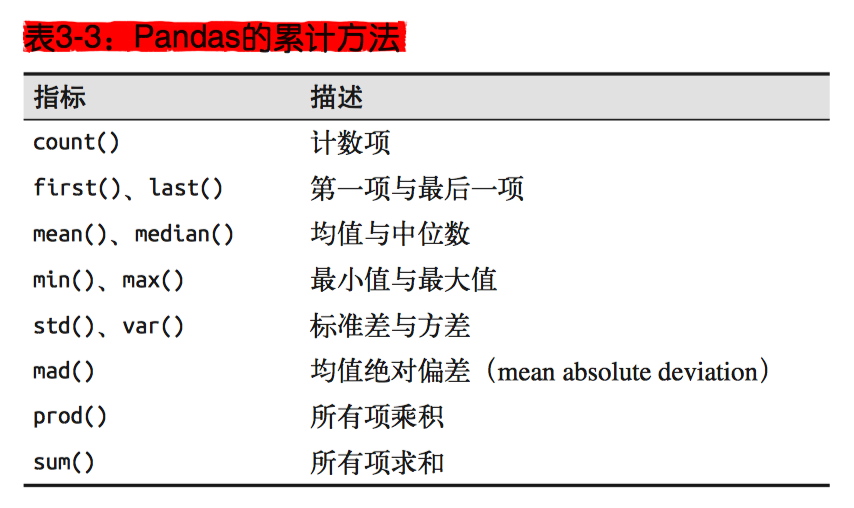

但若想深入理解数据，仅仅依靠累计函数是远远不够的。数据累计的下一级别是`groupby`操作，它可以让你快速、有效地计算数据各子集的累计值。

### 3.9.3 GroupBy：分割、应用和组合
我们经常需要对某些标签或索引的局部进行累计分析，这时就需要用到`groupby`了。虽然分组(groupby)这个名字是借用SQL数据库语言的命令，但其理念引用发明`R语言`frame的`Hadley Wickham`的观点可能更合适：`分割`(split)、`应用`(apply)和`组合`(combine)。

#### 3.9.3.1 分割、应用和组合
一个经典`分割-应用-组合`操作示例如`图3-1`所示，其中“apply”的是一个求和函数。`图3-1`清晰地描述了`GroupBy`的过程。
+ 分割步骤将 DataFrame 按照指定的键分割成若干组
+ 应用步骤对每个组应用函数，通常是累计、转换或过滤函数
+ 组合步骤将每一组的结果合并成一个输出数组

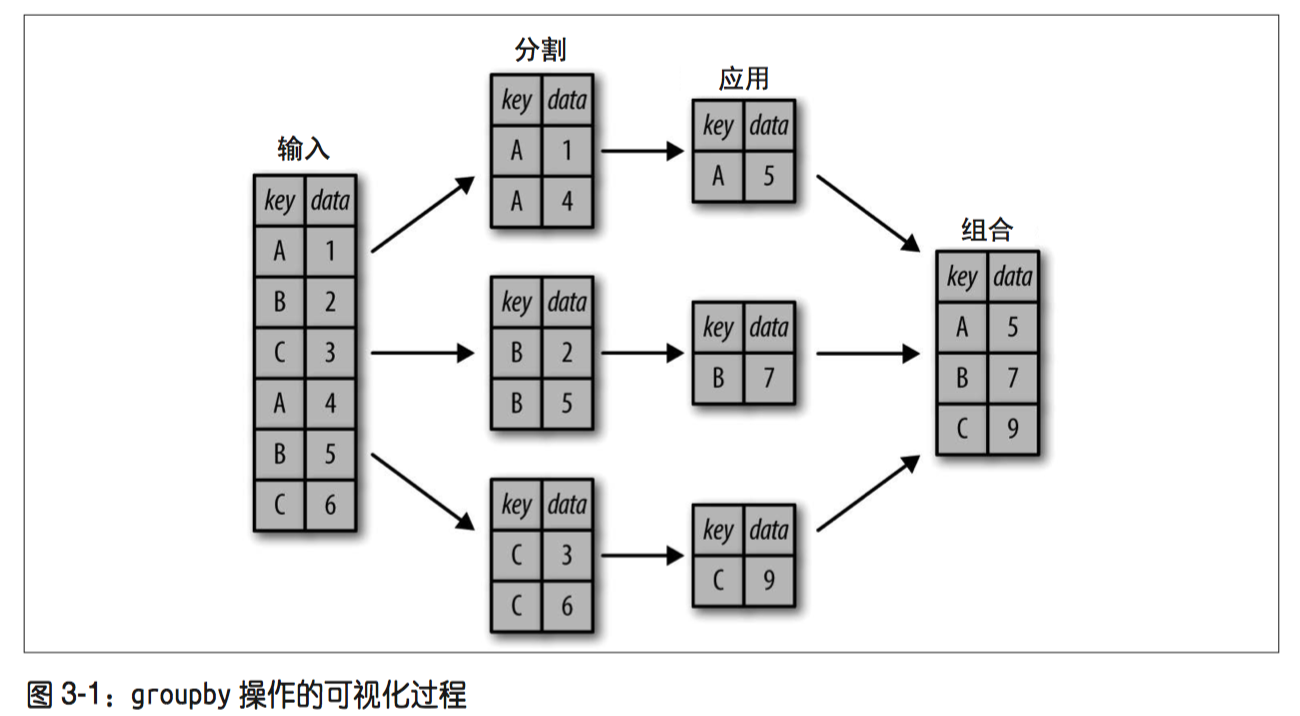

虽然我们也可以通过前面介绍的一系列的掩码、累计与合并操作来实现，但是意识到中间分割过程不需要显式地暴露出来这一点十分重要。而且`GroupBy`经常只需要一行代码就可以计算每组的和、均值、计数、最小值以及其他累计值。`GroupBy`的用处就是将这些步骤进行抽象：用户不需要知道在底层如何计算，只要把操作看成一个整体就够了。

以`图3-1`所示的计算作为具体的示例：

In [212]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, 
                  columns=['key', 'data']) 
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


我们可以用DataFrame的`groupby()`方法进行绝大多数常见的`分割-应用-组合`操作，将需要分组的列名传进去即可：

In [213]:
df.groupby('key')

**注意：这里的返回值不是一个DataFrame对象，而是一个DataFrameGroupBy对象。这个对象的魔力在于，你可以将它看成是一种特殊形式的DataFrame，里面隐藏着若干组数据，但是在没有应用累计函数之前不会计算。这种“延迟计算”(lazy evaluation)的方法使得大多数常见的累计操作可以通过一种对用户而言几乎是透明的方式非常高效地实现**。

为了得到这个结果，可以对`DataFrameGroupBy`对象应用累计函数，它会完成相应的`应用-组合`步骤并生成结果：

In [214]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


#### 3.9.3.2 GroupBy对象
`GroupBy对象`是一种非常灵活的抽象类型。在大多数场景中，你可以将它看成是DataFrame的集合，在底层解决所有难题。让我们用行星数据来做一些演示。

`GroupBy`中最重要的操作可能就是`aggregate`、`ﬁlter`、`transform`和`apply`了，后文将详细介绍这些内容，现在先来介绍一些`GroupBy`的基本操作方法。

**按列取值**
`GroupBy对象`与DataFrame一样，也支持按列取值，并返回一个修改过的`GroupBy对象`，例如：

In [215]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [216]:
planets.groupby('method')

In [217]:
planets.groupby('method')['orbital_period']

这里从原来的DataFrame中取某个列名作为一个Series组。与`GroupBy对象`一样，直到我们运行累计函数，才会开始计算：

In [218]:
# 计算不同方法下所有行星公转周期(按天计算)的中位数
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

**按组迭代**
`GroupBy对象`支持直接按组进行迭代，返回的每一组都是Series或DataFrame：

In [219]:
for (method, group) in planets.groupby('method'): 
    print("{0:30s} shape={1}".format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


尽管通常还是使用内置的`apply功能`速度更快，但这种方式在手动处理某些问题时非常有用，后面会详细介绍。

**调用方法**
借助Python类的魔力(`@classmethod`)，可以让任何不由`GroupBy对象`直接实现的方法直接应用到每一组，无论是DataFrame还是Series对象都同样适用。例如，你可以用DataFrame的describe()方法进行累计，对每一组数据进行描述性统计：

In [220]:
planets.groupby('method')['year'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


这张表可以帮助我们对数据有更深刻的认识，例如大多数行星都是通过Radial Velocity和Transit方法发现的，而且后者在近十年变得越来越普遍(得益于更新、更精确的望远镜)。最新的Transit Timing Variation和Orbital Brightness Modulation方法在2011年之后才有新的发现。

这只是演示Pandas调用方法的示例之一。方法首先会应用到每组数据上，然后结果由`GroupBy`组合后返回。另外，任意DataFrame/Series的方法都可以由`GroupBy`方法调用，从而实现非常灵活强大的操作。

#### 3.9.3.3 累计、过滤、转换和应用
为了方便后面内容的演示，使用下面这个DataFrame：

In [221]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'], 
                   'data1': range(6), 
                   'data2': rng.randint(0, 10, 6)}, 
                  columns = ['key', 'data1', 'data2']) 
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


**累计**
我们目前比较熟悉的`GroupBy`累计方法只有`sum()`和`median()`之类的简单函数，但是`aggregate()`其实可以支持更复杂的操作，比如字符串、函数或者函数列表，并且能一次性计算所有累计值。下面来快速演示一个例子：

In [222]:
df.groupby('key').aggregate([min, np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

另一种用法就是通过Python字典指定不同列需要累计的函数：

In [223]:
df.groupby('key').aggregate({'data1':'min', 'data2':'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


**过滤**
过滤操作可以让你按照分组的属性丢弃若干数据。例如，我们可能只需要保留标准差超过某个阈值的组：

In [224]:
def filter_func(x):
    return x['data2'].std() > 4

print(df, "\n"); print(df.groupby('key').std(), "\n"); print(df.groupby('key').filter(filter_func))

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9 

       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641 

  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9


**转换**
累计操作返回的是对组内全量数据缩减过的结果，而转换操作会返回一个新的全量数据。数据经过转换之后，其形状与原来的输入数据是一样的。例如将每一组的样本数据减去各组的均值，实现数据标准化：

In [225]:
df.groupby('key').transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


**apply()方法**
`apply()`方法让你可以在每个组上应用任意方法。这个函数输入一个DataFrame，返回一个Pandas对象或标量。组合操作会适应返回结果类型。

下面的例子就是用`apply()`方法将第一列数据以第二列的和为基数进行标准化：

In [226]:
def norm_by_data2(x):
    # x是一个分组数据的DataFrame 
    x['data1'] /= x['data2'].sum() 
    return x

print(df, "\n"); print(df.groupby('key').apply(norm_by_data2))

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9 

  key     data1  data2
0   A  0.000000      5
1   B  0.142857      0
2   C  0.166667      3
3   A  0.375000      3
4   B  0.571429      7
5   C  0.416667      9


GroupBy里的`apply()`方法非常灵活，唯一需要注意的地方是它总是输入分组数据的DataFrame，返回Pandas对象或标量。具体如何选择需要视情况而定。

#### 3.9.3.4 设置分割的键
之前一直在用列名分割DataFrame，还有更多的分组方法。

**将列表、数组、Series或索引作为分组键**
分组键可以是长度与DataFrame匹配的任意Series或列表：

In [227]:
L = [0, 1, 0, 1, 2, 0] 
print(df, "\n"); print(df.groupby(L).sum())

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9 

   data1  data2
0      7     17
1      4      3
2      4      7


因此，还有一种比前面直接用列名更啰嗦的表示方法`df.groupby('key')`：

In [228]:
print(df, "\n"); print(df.groupby(df['key']).sum())

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9 

     data1  data2
key              
A        3      8
B        5      7
C        7     12


**用字典或Series将索引映射到分组名称**
另一种方法是提供一个字典，将索引映射到分组键：

In [229]:
df2 = df.set_index('key')
mapping = {'A': 'vowel', 
           'B': 'consonant', 
           'C': 'consonant'} 
print(df2, "\n"); print(df2.groupby(mapping).sum())

     data1  data2
key              
A        0      5
B        1      0
C        2      3
A        3      3
B        4      7
C        5      9 

           data1  data2
consonant     12     19
vowel          3      8


**任意Python函数**
可以将任意Python函数传入`groupby`，函数映射到索引，然后新的分组输出：

In [230]:
print(df2); print(df2.groupby(str.lower).mean())

     data1  data2
key              
A        0      5
B        1      0
C        2      3
A        3      3
B        4      7
C        5      9
   data1  data2
a    1.5    4.0
b    2.5    3.5
c    3.5    6.0


**多个有效键构成的列表**
此外，任意之前有效的键都可以组合起来进行分组，从而返回一个多级索引的分组结果：

In [231]:
df2.groupby([str.lower, mapping]).mean()

,,data1,data2
a,vowel,1.5,4.0
b,consonant,2.5,3.5
c,consonant,3.5,6.0


#### 3.9.3.5 分组案例
我们可以运用上述知识，获取不同方法和不同年份发现的行星数量：

In [232]:
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's' 
decade.name = 'decade' 
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


## 3.10 数据透视表
我们已经介绍过`GroupBy抽象类`是如何探索数据集内部的关联性的了。`数据透视表`(pivot table)是一种类似的操作方法，常见于Excel与类似的表格应用中。数据透视表将每一列数据作为输入，输出将数据不断细分成多个维度累计信息的二维数据表。**人们有时容易弄混数据透视表与GroupBy，但我觉得数据透视表更像是一种多维的GroupBy累计操作。也就是说，虽然你也可以`分割-应用-组合`，但是分割与组合不是发生在一维索引上，而是在二维网格上(行列同时分组)**。

### 3.10.1 演示数据透视表
这一节的示例将采用泰坦尼克号的乘客信息数据库来演示：

In [233]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


这份数据包含了惨遭厄运的每位乘客的大量信息，包括性别(gender)、年龄(age)、船舱等级(class)和船票价格(fare paid)等。

### 3.10.2 手工制作数据透视表
在研究这些数据之前，先将它们按照性别、最终生还状态或其他组合属性进行分组。你可以用`GroupBy`来实现，例如这样统计不同性别乘客的生还率：

In [234]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


这组数据会立刻给我们一个直观感受：有四分之三的女性被救，但只有五分之一的男性被救！

我们还可以进一步探索，同时观察不同性别与船舱等级的生还情况。根据GroupBy的操作流程，我们也许能够实现想要的结果：将船舱等级`class`与性别`sex`分组，然后选择生还状态`survived`列，应用均值累计函数，再将各组结果组合，最后通过行索引转列索引操作将最里层的行索引转换成列索引，形成二维数组。代码如下所示：

In [235]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


代码看上去有点复杂，要理解这个长长的语句可不是那么容易的事。由于二维的`GroupBy`应用场景非常普遍，因此Pandas提供了一个快捷方式`pivot_table`来快速解决多维的累计分析任务。

### 3.10.3 数据透视表语法
用DataFrame的`pivot_table`实现的效果等同于上一节的管道命令的代码：

In [236]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


#### 3.10.3.1 多级数据透视表
与GroupBy类似，数据透视表中的分组也可以通过各种参数指定多个等级。例如，把年龄`age`加进去作为第三个维度：

In [237]:
age = pd.cut(titanic['age'], [0, 18, 80]) 
titanic.pivot_table('survived', index=['sex', age], columns='class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

对某一列也可以使用同样的策略，我们用`pd.qcut`将船票价格按照计数项等分为两份，加入数据透视表，结果生成一个带层级索引的四维累计数据表，通过网格可以显示不同数值之间的相关性：

In [238]:
fare = pd.qcut(titanic['fare'], 2) 
titanic.pivot_table('survived', index=['sex', age], columns=[fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308  

#### 3.10.3.2 其他数据透视表选项
DataFrame的`pivot_table`方法的完整签名如下所示：
```python
# Pandas0.18版的函数签名 
DataFrame.pivot_table(data, values=None, index=None, columns=None, 
                      aggfunc='mean', fill_value=None, margins=False, 
                      dropna=True, margins_name='All')
```

我们已经介绍过前面三个参数了，现在来看看其他参数。`fill_value`和`dropna`这两个参数用于处理缺失值；`aggfunc`参数用于设置累计函数类型，默认值是均值。累计函数可以用一些常见的字符串(`sum`、`mean`、`count`、`min`、`max`等)表示，也可以用标准的累计函数(`np.sum()`、`min()`、`sum()`等)表示。另外，还可以通过字典为不同的列指定不同的累计函数：

In [239]:
titanic.pivot_table(index='sex', columns='class', aggfunc={'survived':sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

需要注意的是，这里忽略了一个参数`values`。当我们为`aggfunc`指定映射关系的时候，待透视的数值就已经确定了。

当需要计算每一组的总数时，可以通过`margins`参数来设置：

In [240]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


这样就可以自动获取不同性别下船舱等级与生还率的相关信息、不同船舱等级下性别与生还率的相关信息，以及全部乘客的生还率。`margin`的标签可以通过`margins_name`参数进行自定义，默认值是`All`。

### 3.10.4 案例：美国人的生日
再来看一个有趣的例子，美国疾病防治中心提供的[公开生日数据](https://raw.githubusercontent.com/jakevdp/data-CDCbirths/ master/births.csv)。`Andrew Gelman`和他的团队已经对这个数据集进行了深入的分析，详情请参见[博文](http://bit.ly/2fZzW8K)。

数据比较简单，只包含了不同出生日期与性别的出生人数：

In [241]:
births = pd.read_csv('data/births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


增加一列表示不同年代，看看各年代的男女出生比例：

In [242]:
births['decade'] = 10 * (births['year'] // 10) 
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


我们马上就会发现，每个年代的男性出生率都比女性出生率高：

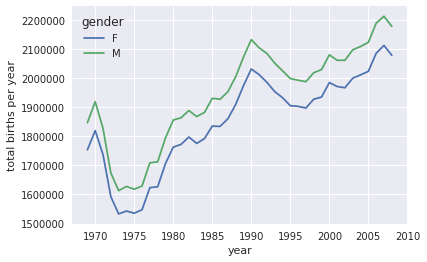

In [243]:
# 使用Seaborn风格
sns.set() 
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot() 
plt.ylabel('total births per year')
plt.show()

我们必须对数据做一点儿清理工作，消除由于输错了日期而造成的异常点(如6月31号)或者是缺失值(如1999年6月)。消除这些异常的简便方法就是直接删除异常值，可以通过更稳定的`sigma消除法`(sigma-clipping，按照正态分布标准差划定范围，SciPy中默认是四个标准差)操作来实现：

In [244]:
quartiles = np.percentile(births['births'], [25, 50, 75]) 
mu = quartiles[1] 
sig = 0.74 * (quartiles[2] - quartiles[0])

最后一行是样本均值的稳定性估计(robust estimate)，其中`0.74`是指标准正态分布的分位数间距。在`query()`方法中用这个范围就可以将有效的生日数据筛选出来了：

In [245]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

然后，将`day`列设置为整数。这列数据在筛选之前是字符串，因为数据集中有的列含有缺失值`null`：

In [246]:
births['day'] = births['day'].astype(int)

现在就可以将年月日组合起来创建一个日期索引了，这样就可以快速计算每一行是星期几：

In [247]:
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')
births['dayofweek'] = births.index.dayofweek

用这个索引可以画出不同年代不同星期的日均出生数据：

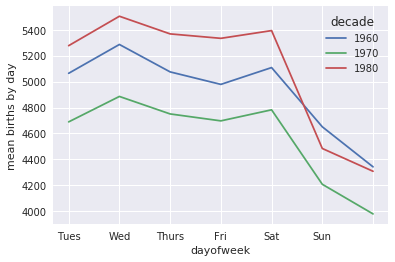

In [248]:
births.pivot_table('births', index='dayofweek', columns='decade', aggfunc='mean').plot() 
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']) 
plt.ylabel('mean births by day');
plt.show()

由图可知，周末的出生人数比工作日要低很多。

另一个有趣的图表是画出各个年份平均每天的出生人数，可以按照月和日两个维度分别对数据进行分组：

In [249]:
births_by_date = births.pivot_table('births', [births.index.month, births.index.day]) 
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

这是一个包含月和日的多级索引。为了让数据可以用图形表示，我们可以虚构一个年份，与月和日组合成新索引(注意日期为2月29日时，索引年份需要用闰年，例如2012) ：

In [250]:
births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index] 
births_by_date.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


如果只关心月和日的话，这就是一个可以反映一年中平均每天出生人数的时间序列：

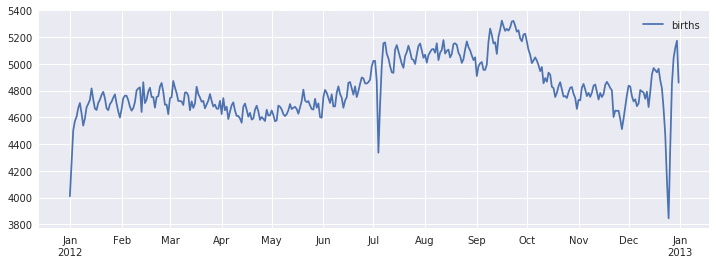

In [251]:
fig, ax = plt.subplots(figsize=(12, 4)) 
births_by_date.plot(ax=ax);
plt.show()

从图中可以明显看出，在美国节假日的时候，出生人数急速下降。这种现象可能是由于医院放假导致的接生减少，而非某种自然生育的心理学效应。

## 3.11 向量化字符串操作
使用Python的一个优势就是字符串处理起来比较容易。在此基础上创建的Pandas同样提供了一系列向量化字符串操作(vectorized string operation)，它们都是在处理现实工作中的数据时不可或缺的功能。

### 3.11.1 Pandas字符串操作简介
前面已经介绍过如何用NumPy和Pandas快速地对多个数组元素执行运算操作：

In [252]:
x = np.array([2, 3, 5, 7, 11, 13]) 
x * 2

array([ 4,  6, 10, 14, 22, 26])

向量化操作简化了纯数值的数组操作语法，我们不需要再担心数组的长度或维度，只需要关心需要的操作。然而，由于NumPy并没有为字符串数组提供简单的接口，因此需要通过繁琐的`for`循环来解决问题：

In [253]:
data = ['peter', 'Paul', 'MARY', 'gUIDO'] 
[s.capitalize() for s in data]

['Peter', 'Paul', 'Mary', 'Guido']

虽然这么做对于某些数据可能是有效的，但是假如数据中出现了缺失值就会引起异常：

In [254]:
try:
    data = ['peter', 'Paul', None, 'MARY', 'gUIDO'] 
    [s.capitalize() for s in data]
except AttributeError as e: 
    print(e)

'NoneType' object has no attribute 'capitalize'


Pandas为包含字符串的Series和Index对象提供的`str属性`堪称两全其美的方法，它既可以满足向量化字符串操作的需求，又可以正确地处理缺失值：

In [255]:
names = pd.Series(data) 
names

0    peter
1     Paul
2     None
3     MARY
4    gUIDO
dtype: object

现在就可以直接调用转换大写方法`capitalize()`将所有的字符串变成大写形式，缺失值会被跳过：

In [256]:
names.str.capitalize()

0    Peter
1     Paul
2     None
3     Mary
4    Guido
dtype: object

### 3.11.2 Pandas字符串方法列表
Pandas绝大多数的字符串语法都很直观。我们将采用一些人名来演示：

In [257]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam', 
                   'Eric Idle', 'Terry Jones', 'Michael Palin'])

几乎所有Python内置的字符串方法都被复制到Pandas的向量化字符串方法中：
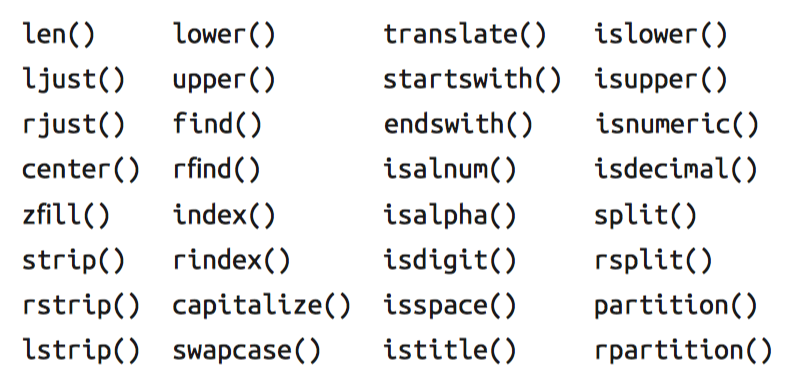

需要注意的是，这些方法的返回值不同：

In [258]:
# 返回一个字符串Series
monte.str.lower()

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

In [259]:
monte.str.len()

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

In [260]:
monte.str.startswith('T')

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

In [261]:
# 返回列表或其他复合值
monte.str.split()

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

#### 3.11.2.2 使用正则表达式的方法
还有一些支持正则表达式的方法可以用来处理每个字符串元素：
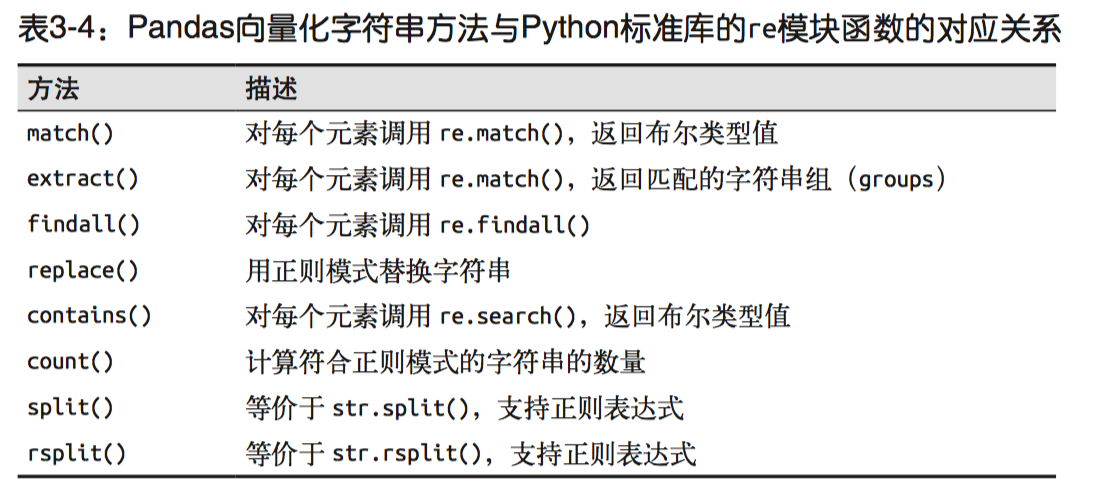

通过这些方法，你就可以实现各种有趣的操作了。例如，可以提取元素前面的连续字母作为每个人的名字(ﬁrst name)：

In [262]:
monte.str.extract('([A-Za-z]+)')

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


0     Graham
1       John
2      Terry
3       Eric
4      Terry
5    Michael
dtype: object

还能实现更复杂的操作，例如找出所有开头和结尾都是辅音字母的名字：

In [263]:
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

#### 3.11.2.3 其他字符串方法
还有其他一些方法也可以实现方便的操作：
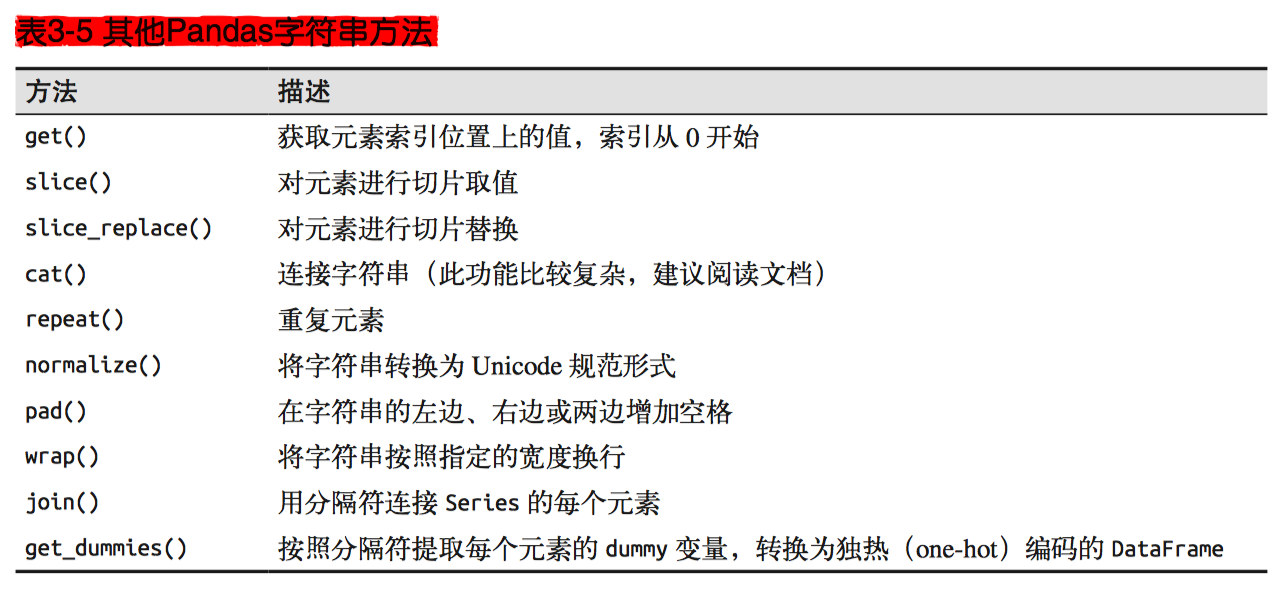

**向量化字符串的取值与切片操**
`get()`与`slice()`操作可以从每个字符串数组中获取向量化元素。例如，我们可以通过`str.slice(0,3)`获取每个字符串数组的前三个字符。通过Python的标准取值方法也可以取得同样的效果，例如`df.str.slice(0,3)`等价于`df.str[0:3]`：

In [264]:
monte.str[0:3]

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

`get()`与`slice()`操作还可以在`split()`操作之后使用。例如获取每个姓名的`last name`：

In [265]:
monte.str.split().str.get(-1)

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

**指标变量**
当你的数据有一列包含了若干已被编码的指标(coded indicator)时，`get_dummies()`方法可以将它们进行One-hot编码。例如，假设有一个包含了某种编码信息的数据集，如`A=出生在美国`、`B=出生在英国`、`C=喜欢奶酪`、`D=喜欢午餐肉`：

In [266]:
full_monte = pd.DataFrame({'name': monte, 
                           'info': ['B|C|D', 'B|D', 'A|C', 'B|D', 'B|C', 'B|C|D']}) 
full_monte

,info,name
0,B|C|D,Graham Chapman
1,B|D,John Cleese
2,A|C,Terry Gilliam
3,B|D,Eric Idle
4,B|C,Terry Jones
5,B|C|D,Michael Palin


In [269]:
full_monte['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


### 3.11.3 案例：食谱数据库
向量化字符串操作方法非常适合用来处理现实中那些凌乱的数据。下面将通过一个公开食谱数据库的进行演示，我们的目标是将这些食谱数据解析为食材列表，这样就可以根据现有的食材快速找到食谱。

这个数据库是JSON格式的，通过`pd.read_json`读取数据：

In [270]:
try:
    recipes = pd.read_json('data/recipeitems-latest.json') 
except ValueError as e:
    print("ValueError:", e)

ValueError: Trailing data


我们得到提示数据里有`数据断行`的`ValueError`错误，原因是虽然文件中的每一行都是一个有效的JSON对象，但是全文却不是这样。来看看文件是不是这样：

In [271]:
with open('data/recipeitems-latest.json') as f: 
    line = f.readline() 
pd.read_json(line).shape

(2, 12)

解决这个问题的一种方法就是新建一个字符串，将所有行JSON对象连接起来，然后再通过`pd.read_json`来读取所有数据：

In [272]:
with open('data/recipeitems-latest.json', 'r') as f:
    data = (line.strip() for line in f)
    data_json = "[{0}]".format(','.join(data)) 
recipes = pd.read_json(data_json)
recipes.shape

(173278, 17)

这样就会看到将近20万份食谱，共17列。抽一行看看具体内容：

In [273]:
recipes.iloc[0]

_id                                {'$oid': '5160756b96cc62079cc2db15'}
cookTime                                                          PT30M
creator                                                             NaN
dateModified                                                        NaN
datePublished                                                2013-03-11
description           Late Saturday afternoon, after Marlboro Man ha...
image                 http://static.thepioneerwoman.com/cooking/file...
ingredients           Biscuits\n3 cups All-purpose Flour\n2 Tablespo...
name                                    Drop Biscuits and Sausage Gravy
prepTime                                                          PT10M
recipeCategory                                                      NaN
recipeInstructions                                                  NaN
recipeYield                                                          12
source                                                  thepione

这里有一堆信息，其中有不少字段形式混乱。值得关注的是，食材列表是字符串形式，我们需要从中抽取感兴趣的信息。下面来仔细看看这个字段：

In [274]:
recipes.ingredients.str.len().describe()

count    173278.000000
mean        244.617926
std         146.705285
min           0.000000
25%         147.000000
50%         221.000000
75%         314.000000
max        9067.000000
Name: ingredients, dtype: float64

食材列表平均250个字符，最短的字符串是0，最长的竟然接近1万字符！出于好奇心，来看看这个拥有最长食材列表的究竟是哪道菜：

In [275]:
recipes.name[np.argmax(recipes.ingredients.str.len())]

/usr/local/lib/python3.5/dist-packages/numpy/core/fromnumeric.py:57: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


'Carrot Pineapple Spice &amp; Brownie Layer Cake with Whipped Cream &amp; Cream Cheese Frosting and Marzipan Carrots'

从名字就可以看出，这绝对是个复杂的食谱。 

我们还可以再做一些累计探索，例如看看哪些食谱是早餐：

In [276]:
recipes.description.str.contains('[Bb]reakfast').sum()

3524

看看有多少食谱用肉桂(cinnamon)作为食材：

In [277]:
recipes.ingredients.str.contains('[Cc]innamon').sum()

10526

可以看看究竟是哪些食谱里把肉桂错写成了`cinamon`：

In [278]:
recipes.ingredients.str.contains('[Cc]inamon').sum()

11

#### 3.11.3.1 制作简易的美食推荐系统
现在让我们来制作一个简易的美食推荐系统：如果用户提供一些食材，系统就会推荐使用了所有食材的食谱。这说起来是容易，但是由于大量不规则数据的存在，这个任务变得十分复杂，例如并没有一个简单直接的办法可以从每一行数据中清理出一份干净的食材列表。因此，我们在这里简化处理：首先提供一些常见食材列 表，然后通过简单搜索判断这些食材是否在食谱中。为了简化任务，这里只列举常用的香料和调味料：

In [279]:
spice_list = ['salt', 'pepper', 'oregano', 'sage', 'parsley', 
              'rosemary', 'tarragon', 'thyme', 'paprika', 'cumin']

现在就可以通过一个由`True`与`False`构成的布尔类型的`DataFrame`来判断食材是否出现在某个食谱中：

In [280]:
spice_df = pd.DataFrame(dict((spice, 
                              recipes.ingredients.str.contains(spice, re.IGNORECASE)) for spice in spice_list)) 
spice_df.head()

,cumin,oregano,paprika,parsley,pepper,rosemary,sage,salt,tarragon,thyme
0,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,True,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


现在找一份使用了欧芹(parsley)、辣椒粉(paprika)和龙蒿叶(tarragon)这三种食材的食谱。通过DataFrame的`query()`方法来快速完成计算：

In [281]:
selection = spice_df.query('parsley & paprika & tarragon') 
len(selection)

10

最后只找到了十份同时包含这三种食材的食谱：

In [282]:
recipes.name[selection.index]

2069      All cremat with a Little Gem, dandelion and wa...
74964                         Lobster with Thermidor butter
93768      Burton's Southern Fried Chicken with White Gravy
113926                     Mijo's Slow Cooker Shredded Beef
137686                     Asparagus Soup with Poached Eggs
140530                                 Fried Oyster Po’boys
158475                Lamb shank tagine with herb tabbouleh
158486                 Southern fried chicken in buttermilk
163175            Fried Chicken Sliders with Pickles + Slaw
165243                        Bar Tartine Cauliflower Salad
Name: name, dtype: object

In [283]:
selection

,cumin,oregano,paprika,parsley,pepper,rosemary,sage,salt,tarragon,thyme
2069,False,False,True,True,True,False,False,False,True,False
74964,False,False,True,True,False,False,False,False,True,False
93768,False,False,True,True,True,False,True,True,True,False
113926,False,False,True,True,True,False,False,True,True,False
137686,False,False,True,True,True,False,False,True,True,False
140530,False,False,True,True,True,False,False,True,True,True
158475,True,False,True,True,True,False,False,True,True,False
158486,False,False,True,True,True,False,False,True,True,False
163175,False,True,True,True,True,False,False,True,True,False
165243,False,False,True,True,True,False,False,True,True,False


## 3.12 处理时间序列
由于Pandas最初是为金融模型而创建的，因此它拥有一些功能非常强大的日期、时间、带时间索引数据的处理工具。本节将介绍的日期与时间数据主要包含三类：
+ 时间戳表示某个具体的时间点(例如2015年7月4日上午7点)
+ 时间间隔与周期表示开始时间点与结束时间点之间的时间长度，例如2015年(指的是2015年1月1日至2015年12月31日这段时间间隔)。周期通常是指一种特殊形式的时间间隔，每个间隔长度相同，彼此之间不会重叠(例如，以24小时为周期构成每一天)
+ 时间增量(timedelta)或持续时间(duration)表示精确的时间长度(例如，某程序运行持续时间22.56秒)

由于篇幅有限，本书对Python或Pandas的时间序列工具仅仅作一个宽泛的综述，总结何时应该使用它们。

### 3.12.1 Python的日期与时间工具
在Python标准库与第三方库中有许多可以表示日期、时间、时间增量和时间跨度(timespan)的工具。尽管Pandas提供的时间序列工具更适合用来处理数据科学问题，但是了解Pandas与Python标准库以及第三方库中的其他时间序列工具之间的关联性将大有裨益。

#### 3.12.1.1 原生Python的日期与时间工具
Python基本的日期与时间功能都在标准库的datetime模块中。如果和第三方库dateutil模块搭配使用，可以快速实现许多处理日期与时间的功能。

例如，用datetime类型创建一个日期：

In [284]:
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

使用`dateutil模块`对各种字符串格式的日期进行正确解析：

In [285]:
date = parser.parse("4th of July, 2015") 
date

datetime.datetime(2015, 7, 4, 0, 0)

In [286]:
# 打印出这一天是星期几
date.strftime('%A')

'Saturday'

在最后一行代码中，为了打印出是星期几，我们使用了一个标准字符串格式(standard string format)代码`%A`，你可以在Python的[datetime文档](https://docs.python.org/3/library/datetime.html)的“strftime”节查看具体信息。关于dateutil的其他日期功能可以通过[dateutil的在线文档](http://labix.org/python-dateutil)学习。

datetime和dateutil模块在处理的时间数据量比较大时速度比较慢。就像之前介绍过的Python的原生列表对象没有NumPy中已经被编码的数值类型数组的性能好一样，Python的原生日期对象同样也没有NumPy中已经被编码的日期类型数组的性能好。

#### 3.12.1.2 时间类型数组
NumPy的`datetime64`类型将日期编码为64位整数，这样可以让日期数组非常紧凑。`datetime64`需要在设置日期时确定具体的输入类型，只要有了这个日期格式，就可以进行快速的向量化运算：

In [287]:
date = np.array('2015-07-04', dtype=np.datetime64) 
date

array(datetime.date(2015, 7, 4), dtype='datetime64[D]')

In [288]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'], dtype='datetime64[D]')

datetime64与timedelta64对象的一个共同特点是，它们都是在基本时间单位(fundamental time unit)的基础上建立的。由于datetime64对象是64位精度，所以可编码的时间范围可以是基本单元的264倍。也就是说，datetime64在时间精度(time resolution)与最大时间跨度(maximum time span)之间达成了一种平衡。

如果你想要一个纳秒级的时间精度，那么你就可以将时间编码到`0~264纳秒`或`600年`之内，NumPy会自动判断输入时间需要使用的时间单位。例如，下面是一个以天为单位的日期：

In [289]:
np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

一个以分钟为单位的日期：

In [290]:
np.datetime64('2015-07-04 12:00')

numpy.datetime64('2015-07-04T12:00')

需要注意的是，时区将自动设置为执行代码的操作系统的当地时区。你可以通过各种格式的代码设置基本时间单位。例如，将时间单位设置为纳秒：

In [291]:
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

NumPy的[datetime64文档](http://docs.scipy.org/doc/numpy/reference/arrays.datetime.html)总结了所有支持相对与绝对时间跨度的时间与日期单位格式代码。

#### 3.12.1.3 Pandas的日期与时间工具
Pandas所有关于日期与时间的处理方法全部都是通过`Timestamp对象`实现的，它利用`numpy.datetime64`的有效存储和向量化接口将`datetime`和`dateutil`的易用性有机结合起来。Pandas通过一组`Timestamp对象`就可以创建一个可以作为Series或DataFrame索引的DatetimeIndex。

例如，用Pandas的方式处理不同格式的日期与时间字符串，获取某一天是星期几：

In [292]:
date = pd.to_datetime("4th of July, 2015") 
date

Timestamp('2015-07-04 00:00:00')

In [293]:
date.strftime('%A')

'Saturday'

In [294]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

### 3.12.2 Pandas时间序列：用时间作索引
Pandas时间序列工具非常适合用来处理带时间戳的索引数据：

In [295]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04', 
                          '2015-07-04', '2015-08-04']) 
data = pd.Series([0, 1, 2, 3], index=index) 
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

可以直接用日期进行切片取值：

In [296]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

直接通过年份切片获取该年的数据：

In [297]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

### 3.12.3 Pandas时间序列数据结构
本节将介绍Pandas用来处理时间序列的基础数据类型：
+ 针对时间戳数据，Pandas提供了`Timestamp`类型。与前面介绍的一样，它本质上是Python的原生datetime类型的替代品，但是在性能更好的numpy.datetime64类型的基础上创建。对应的索引数据结构是`DatetimeIndex`
+ 针对时间周期数据，Pandas提供了`Period`类型。这是利用numpy.datetime64类型将固定频率的时间间隔进行编码。对应的索引数据结构是`PeriodIndex`
+ 针对时间增量或持续时间，Pandas提供了`Timedelta`类型。Timedelta是一种代替Python原生datetime.timedelta类型的高性能数据结构，同样是基于numpy.timedelta64类型。对应的索引数据结构是`TimedeltaIndex`

> Timestamp -> DatetimeIndex  
> Period -> PeriodIndex  
> Timedelta -> TimedeltaIndex  

最基础的日期/时间对象是Timestamp和DatetimeIndex。这两种对象可以直接使用，最常用的方法是`pd.to_datetime()函数`，它可以解析许多日期与时间格式。对`pd.to_datetime()`传递一个日期会返回一个`Timestamp类型`，传递一个时间序列会返回一个`DatetimeIndex`类型：

In [298]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015', 
                        '2015-Jul-6', '07-07-2015', '20150708']) 
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

任何`DatetimeIndex类型`都可以通过`to_period()方法`和一个频率代码转换成`PeriodIndex`类型。下面用`D`将数据转换成单日的时间序列：

In [299]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [300]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

**有规律的时间序列：pd.date_range()**
为了能更简便地创建有规律的时间序列，Pandas提供了一些方法：`pd.date_range()`可以处理时间戳、`pd.period_range()`可以处理周期、`pd.timedelta_range()`可以处理时间间隔。

`pd.date_range()`与之类似，通过开始日期、结束日期和频率代码创建一个有规律的日期序列，默认的频率是天：

In [301]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

pd.date_range('2015-07-03', '2015-07-10')

日期范围不一定非是开始时间与结束时间，也可以是开始时间与周期数`periods`：

In [302]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

可以通过`freq参数`改变时间间隔，例如创建一个按小时变化的时间戳：

In [303]:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

如果要创建一个有规律的周期或时间间隔序列，可以使用`pd.period_range()`和`pd.timedelta_range()`：

In [304]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

In [305]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

### 3.12.4 时间频率与偏移量
Pandas时间序列工具的基础是时间频率或偏移量(offset)代码。就像之前见过的`D`(day)和`H`(hour)代码，我们可以用这些代码设置任意需要的时间间隔。`表3-7`总结了主要的频率代码：
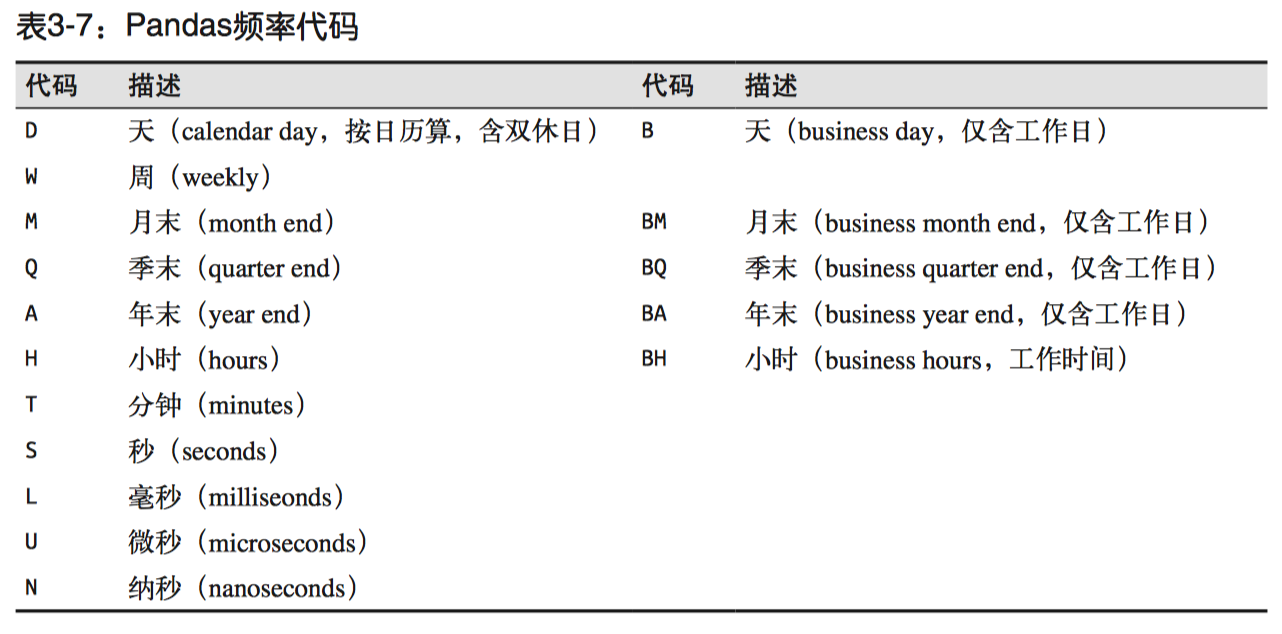

月、季、年频率都是具体周期的结束时间(月末、季末、年末)，而有一些以S(start，开始)为后缀的代码表示日期开始，如`表3-8`所示：
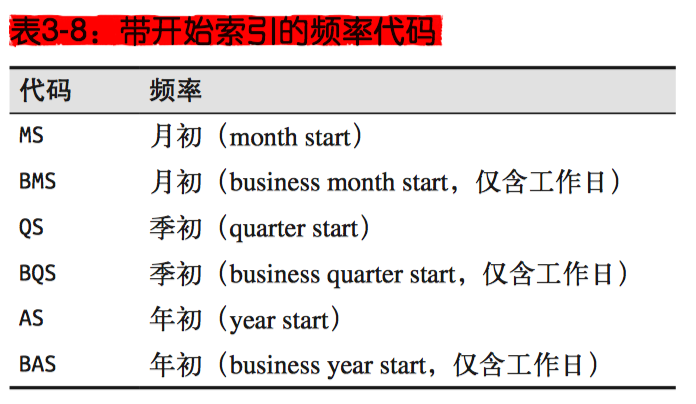

你可以在频率代码后面加三位月份缩写字母来改变季、年频率的开始时间：
+ Q-JAN、BQ-FEB、QS-MAR、BQS-APR 等
+ A-JAN、BA-FEB、AS-MAR、BAS-APR 等

也可以在后面加三位星期缩写字母来改变一周的开始时间：
+ W-SUN、W-MON、W-TUE、W-WED 等

在这些代码的基础上，可以将频率组合起来创建的新的周期。例如，可以用小时(H)和分钟(T)的组合来实现`2小时30分钟`：

In [306]:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

所有这些频率代码都对应Pandas时间序列的偏移量，具体内容可以在`pd.tseries.offsets模块`中找到。例如，可以用下面的方法直接创建一个工作日偏移序列：

In [307]:
from pandas.tseries.offsets import BDay 
pd.date_range('2015-07-01', periods=7, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09'],
              dtype='datetime64[ns]', freq='B')

关于时间频率与偏移量的更多内容，请参考[Pandas在线文档“Date Offset objects”](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#dateoffset-objects)节。

### 3.12.5 重新取样、迁移和窗口
**本节内容代码错误太多，搞不定！**
用日期和时间直观地组织与获取数据是Pandas时间序列工具最重要的功能之一。 Pandas不仅支持普通索引功能(合并数据时自动索引对齐、直观的数据切片和取值方法等)，还专为时间序列提供了额外的操作。

我们用股票数据来演示这些功能。Pandas最初是为金融数据模型服务的，因此可以非常方便地获取金融数据。`pandas-datareader`程序包知道如何从一些可用的数据源导入金融数据，包含Yahoo财经、Google财经和其他数据源。下面来导入Google的历史股票价格：

In [308]:
from pandas_datareader import data
# morningstar
# robinhood
gl = data.DataReader('GOOG', start='2004', end='2016', data_source='quandl') 
gl.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2015-12-31,769.50,769.50,758.34,758.88,1500923.0,0.0,1.0,769.50,769.50,758.34,758.88,1500923.0
2015-12-30,776.60,777.60,766.90,771.00,1293521.0,0.0,1.0,776.60,777.60,766.90,771.00,1293521.0
2015-12-29,766.69,779.98,766.43,776.60,1765012.0,0.0,1.0,766.69,779.98,766.43,776.60,1765012.0
2015-12-28,752.92,762.99,749.52,762.51,1515716.0,0.0,1.0,752.92,762.99,749.52,762.51,1515716.0
2015-12-24,749.55,751.35,746.62,748.40,527223.0,0.0,1.0,749.55,751.35,746.62,748.40,527223.0


绘制收盘价的曲线：

In [309]:
glc = gl['Close']
pd.to_datetime(glc.index.data)

ValueError: cannot include dtype 'M' in a buffer

#### 3.12.5.1 重新取样与频率转换
处理时间序列数据时，经常需要按照新的频率对数据进行重新取样。可以通过`resample()`方法或`asfreq()`方法实现。两个方法的主要差异在于，`resample()`方法是以数据累计(data aggregation)为基础，而`asfreq()`方法是以数据选择(data selection)为基础。

我们用两种方法对数据进行向后取样(down-sample)。这里 用年末(`BA`，最后一个工作日)对数据进行重新取样：

In [310]:
# goog_close.plot(alpha=0.5, style='-')
# goog.resample('BA').mean().plot(style=':') 
# goog.asfreq('BA').plot(style='--')
# plt.legend(['input', 'resample', 'asfreq'], loc='upper left');
# plt.show()
# goog_close.plot(alpha=0.5, style='-')
# goog_close['GOOG'].resample('BA').mean().plot(style=':') 
# plt.show()
goog_close['GOOG'].resample('BA').head(100)

NameError: name 'goog_close' is not defined